## PRÀCTICA XNDL - Abril Risso i Anna Casanovas

### 0. Importem les llibreries necessàries

In [57]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [58]:
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score


from sklearn.ensemble import RandomForestClassifier


In [59]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist, fashion_mnist

from keras.optimizers.legacy import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, fetch_covtype, fetch_california_housing
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1_l2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1_l2, l2

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.regularizers import l1_l2
from typing import List, Dict, Any

import numpy as np
from sklearn.metrics import precision_score, f1_score, recall_score

#### Carreguem el dataset

In [60]:
path_rain_data = "rain_data.csv"
rain_data = pd.read_csv(path_rain_data, header=0, delimiter=',')

In [188]:
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes


## 1. ANÀLISI EXPLORATÒRIA DE DADES

In [61]:
data = rain_data

In [190]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [191]:
print(data.shape)

(67021, 23)


### 1.1 ANÀLISI UNIVARIANT

#### 1.1.1 Variables Numèriques

In [192]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,65864.000000,65940.000000,64271.000000,37591.000000,34831.000000,61576.000000,65971.000000,65328.000000,65257.000000,64388.000000,59750.000000,59761.000000,41303.000000,40071.000000,65689.000000,64811.000000
mean,12.552091,22.480866,3.669512,5.122383,6.514499,42.142150,14.634764,19.187194,72.074781,57.521433,1016.524147,1014.237604,5.053870,5.184148,16.888700,20.822340
std,6.371143,7.108686,10.981571,3.950017,3.932475,14.638665,9.227585,9.171806,18.481003,21.741282,7.343975,7.283068,2.778949,2.620094,6.427827,6.931696
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,8.000000,17.200000,0.000000,2.400000,3.200000,31.000000,7.000000,13.000000,61.000000,42.000000,1011.700000,1009.300000,2.000000,3.000000,12.200000,15.800000
50%,12.300000,21.800000,0.000000,4.400000,6.800000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,6.000000,6.000000,16.500000,20.100000
75%,17.200000,27.400000,2.200000,7.000000,9.900000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.500000,1019.200000,7.000000,7.000000,21.400000,25.500000
max,33.900000,47.300000,371.000000,77.300000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.300000,1038.500000,8.000000,8.000000,39.000000,46.700000


In [62]:
var_num = [feature for feature in data.columns if data[feature].dtypes != 'object' and data[feature].dtypes != 'category' and data[feature].dtypes != 'bool']
print('Number of numerical variables: ', len(var_num))
print('*'*80)
print('Numerical Variables Column: ', var_num)

Number of numerical variables:  16
********************************************************************************
Numerical Variables Column:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


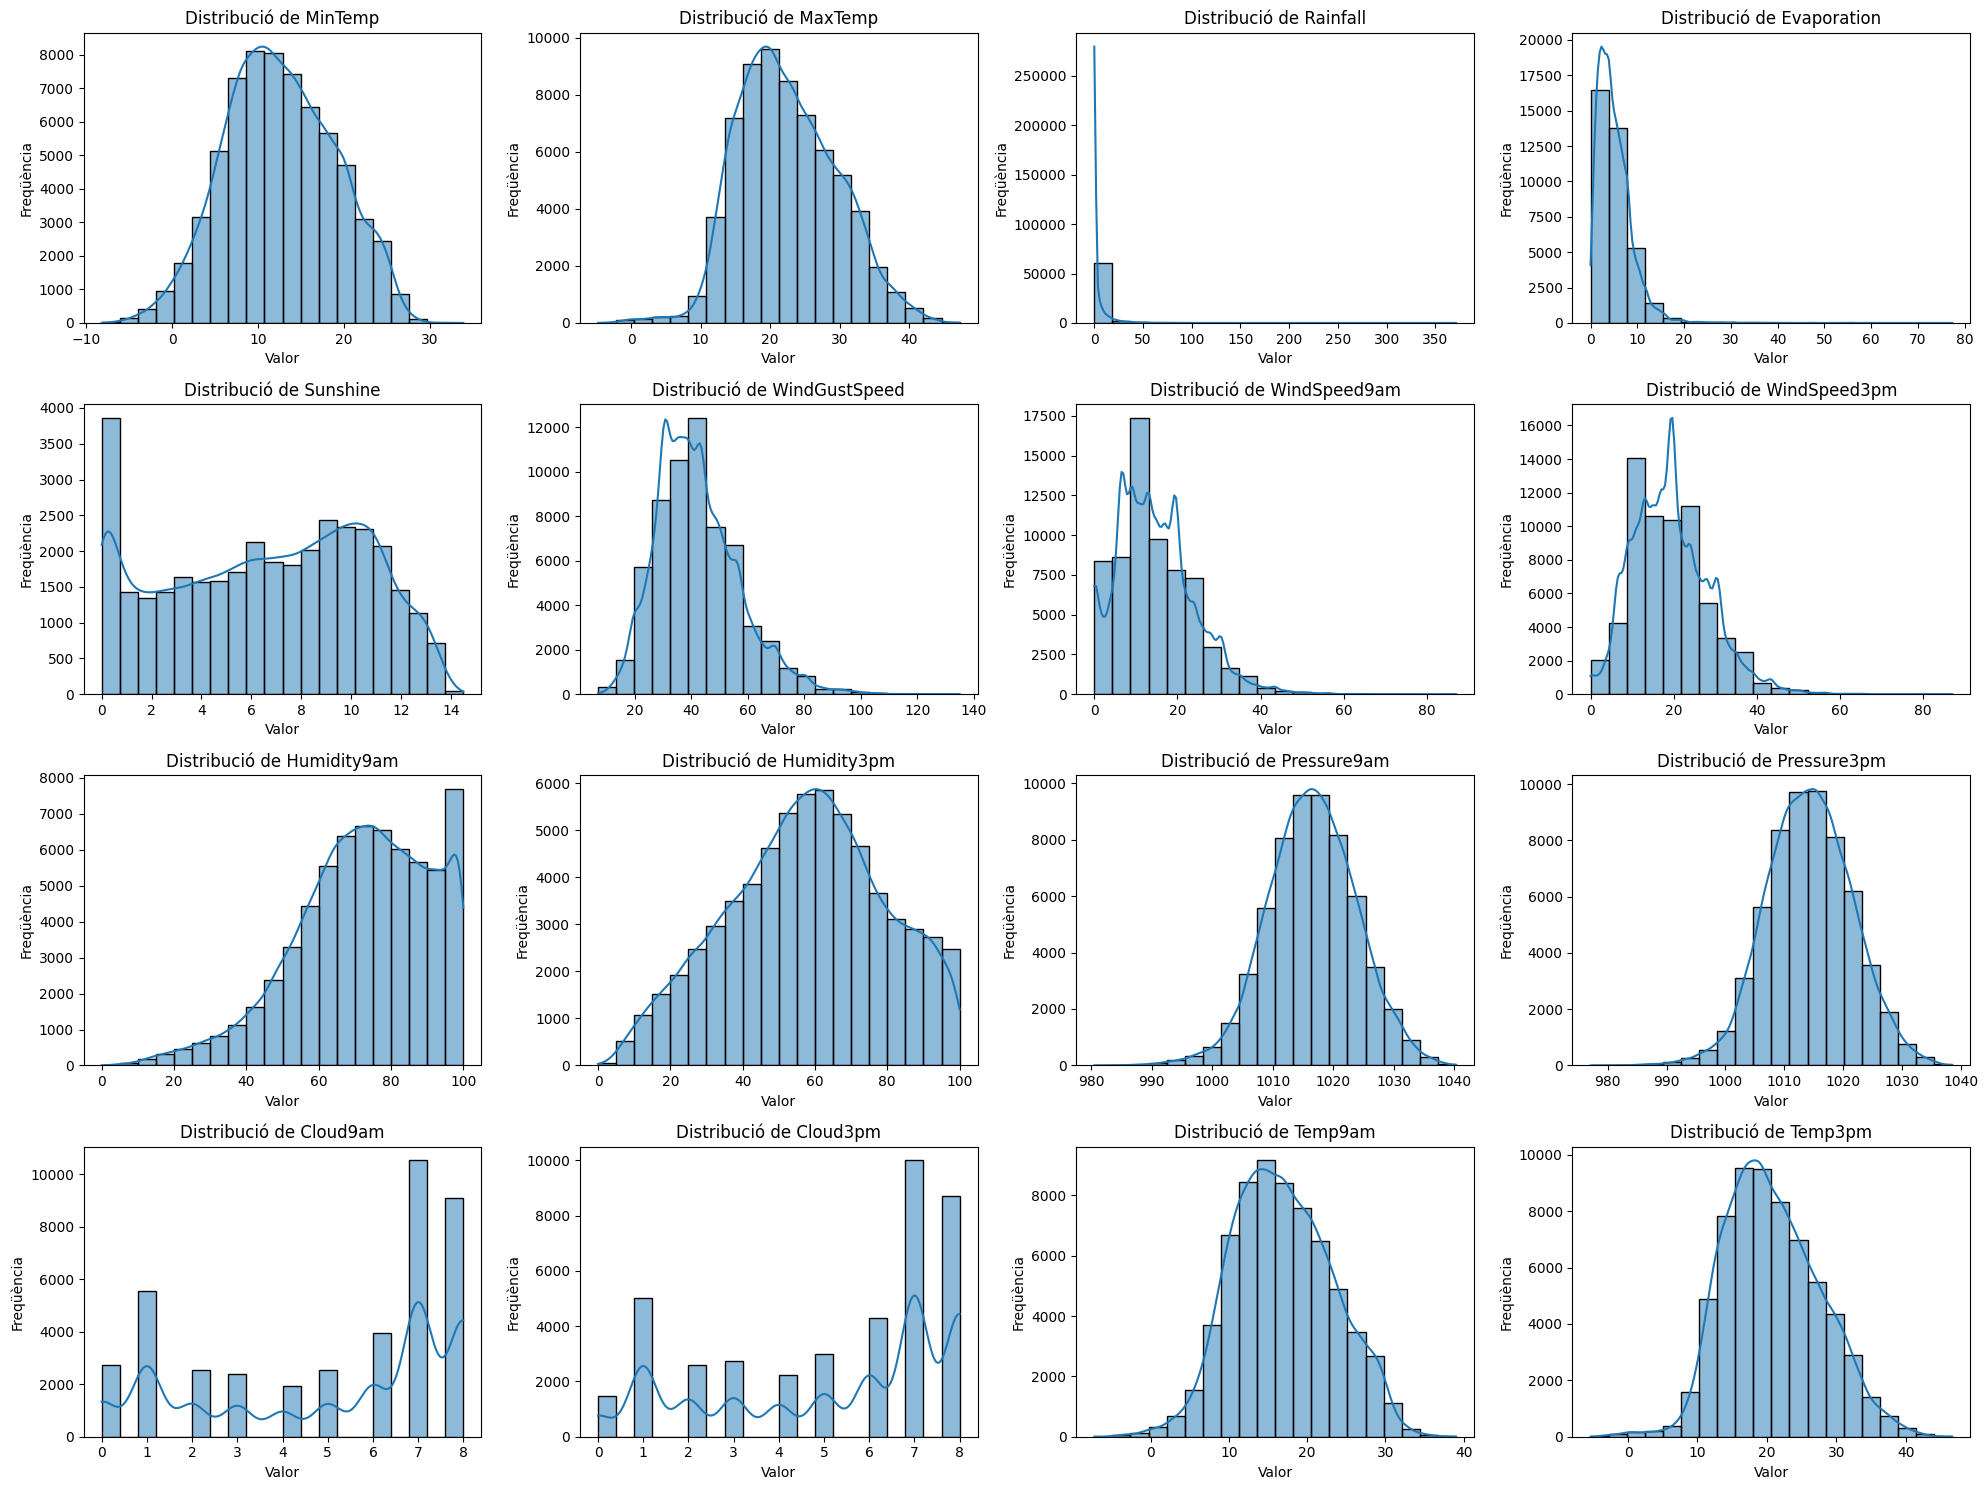

         Variable      Mitjana  Desviació Estàndard
0         MinTemp    12.552091             6.371143
1         MaxTemp    22.480866             7.108686
2        Rainfall     3.669512            10.981571
3     Evaporation     5.122383             3.950017
4        Sunshine     6.514499             3.932475
5   WindGustSpeed    42.142150            14.638665
6    WindSpeed9am    14.634764             9.227585
7    WindSpeed3pm    19.187194             9.171806
8     Humidity9am    72.074781            18.481003
9     Humidity3pm    57.521433            21.741282
10    Pressure9am  1016.524147             7.343975
11    Pressure3pm  1014.237604             7.283068
12       Cloud9am     5.053870             2.778949
13       Cloud3pm     5.184148             2.620094
14        Temp9am    16.888700             6.427827
15        Temp3pm    20.822340             6.931696


In [163]:
estadistiques = pd.DataFrame(columns=['Variable', 'Mitjana', 'Desviació Estàndard'])

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(var_num):
    mitjana = np.mean(data[column])
    desviacio_estandard = np.std(data[column], ddof=1)

    new_row = pd.DataFrame({
        'Variable': [column],
        'Mitjana': [mitjana],
        'Desviació Estàndard': [desviacio_estandard]
    })

    estadistiques = pd.concat([estadistiques, new_row], ignore_index=True)

    sns.histplot(data[column], bins=20, kde=True, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribució de {column}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Freqüència')

plt.tight_layout()
plt.show()

print(estadistiques)

#### 1.1.2 Variables Categòriques

In [63]:
var_cat = [feature for feature in data.columns if data[feature].dtypes == 'O' or data[feature].dtypes == 'category']
print('Number of categorical variables: ', len(var_cat))
print('*'*80)
print('Categorical variables column name:',var_cat)

Number of categorical variables:  7
********************************************************************************
Categorical variables column name: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


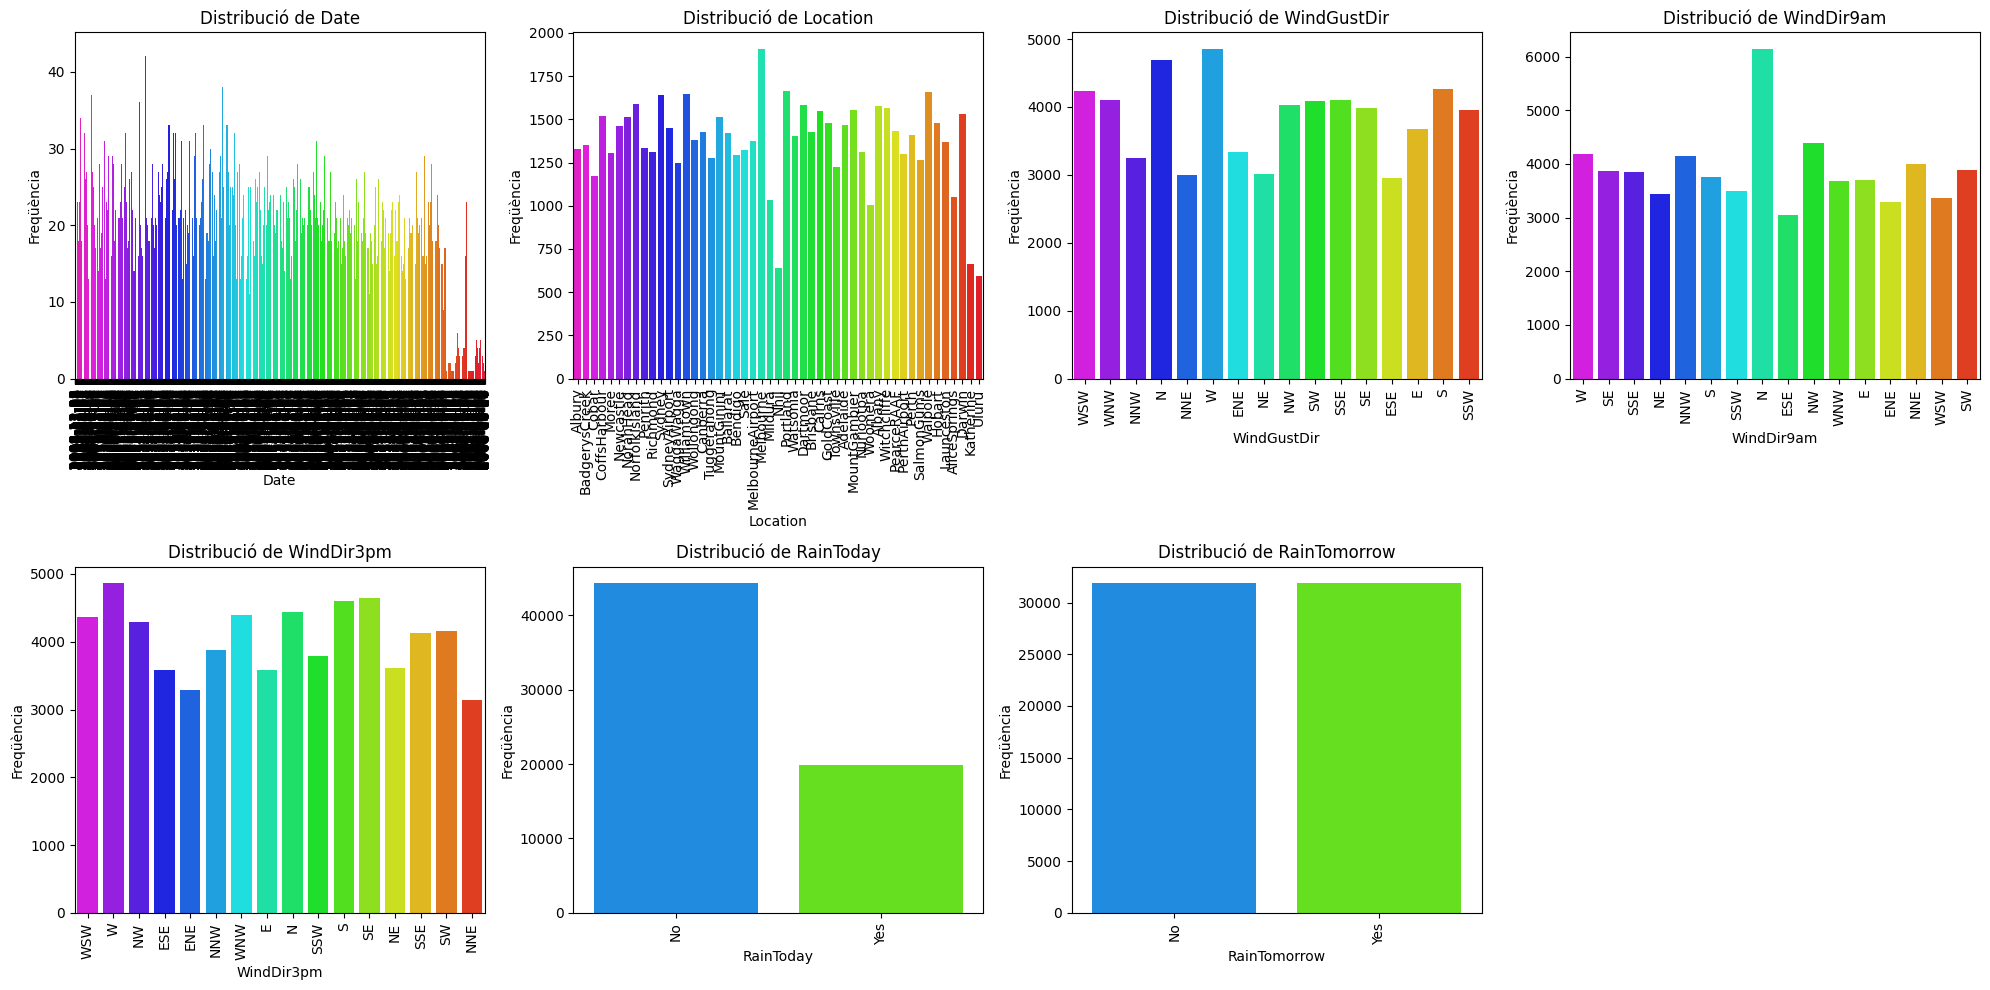

In [165]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  
axes = axes.flatten() 

for i, column in enumerate(var_cat):
    sns.countplot(x=column, hue=column, data=data, palette="gist_rainbow_r", ax=axes[i], legend=False)
    axes[i].set_title(f'Distribució de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Freqüència')

    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Observem la quantitat de valors diferents que tenen cadascuna de les variables del dataset

In [166]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                                         columns=['col_name', 'unique']).sort_values(by=['unique'])
unique_counts

,col_name,unique
22,RainTomorrow,2
21,RainToday,2
18,Cloud3pm,9
17,Cloud9am,9
10,WindDir3pm,16
9,WindDir9am,16
7,WindGustDir,16
12,WindSpeed3pm,42
11,WindSpeed9am,42
1,Location,49


### 1.2 ANÀLISI BIVARIANT

#### 1.2.1 Categòriques amb la variable objectiu

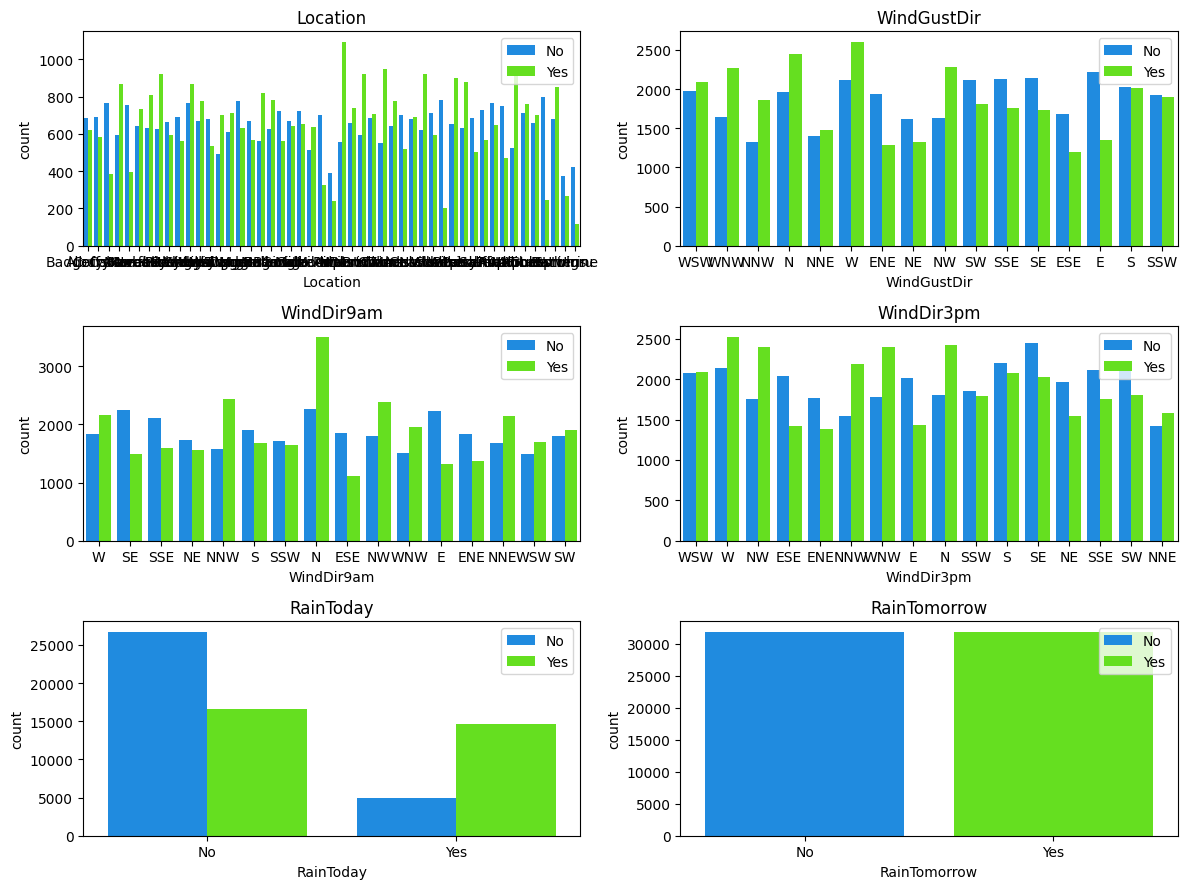

In [167]:
n_cols = 2 
n_rows = (len(var_cat[1:]) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), dpi=100)  
axes = axes.flatten()  

for idx, variable in enumerate(var_cat[1:]):
    sns.countplot(data=data, x=variable, hue='RainTomorrow', palette='gist_rainbow_r', ax=axes[idx])
    axes[idx].legend(loc='upper right')
    axes[idx].set_title(variable)

for ax in axes[len(var_cat[1:]):]:
    ax.set_visible(False) 

plt.tight_layout()
plt.show()

Com es pot observar, algunes de les variables categòriques tenen una gran quantitat de categories.

Més endavant, al preprocessament, tractarem aquestes variables.

#### 1.2.2 Numèriques amb la variable objectiu

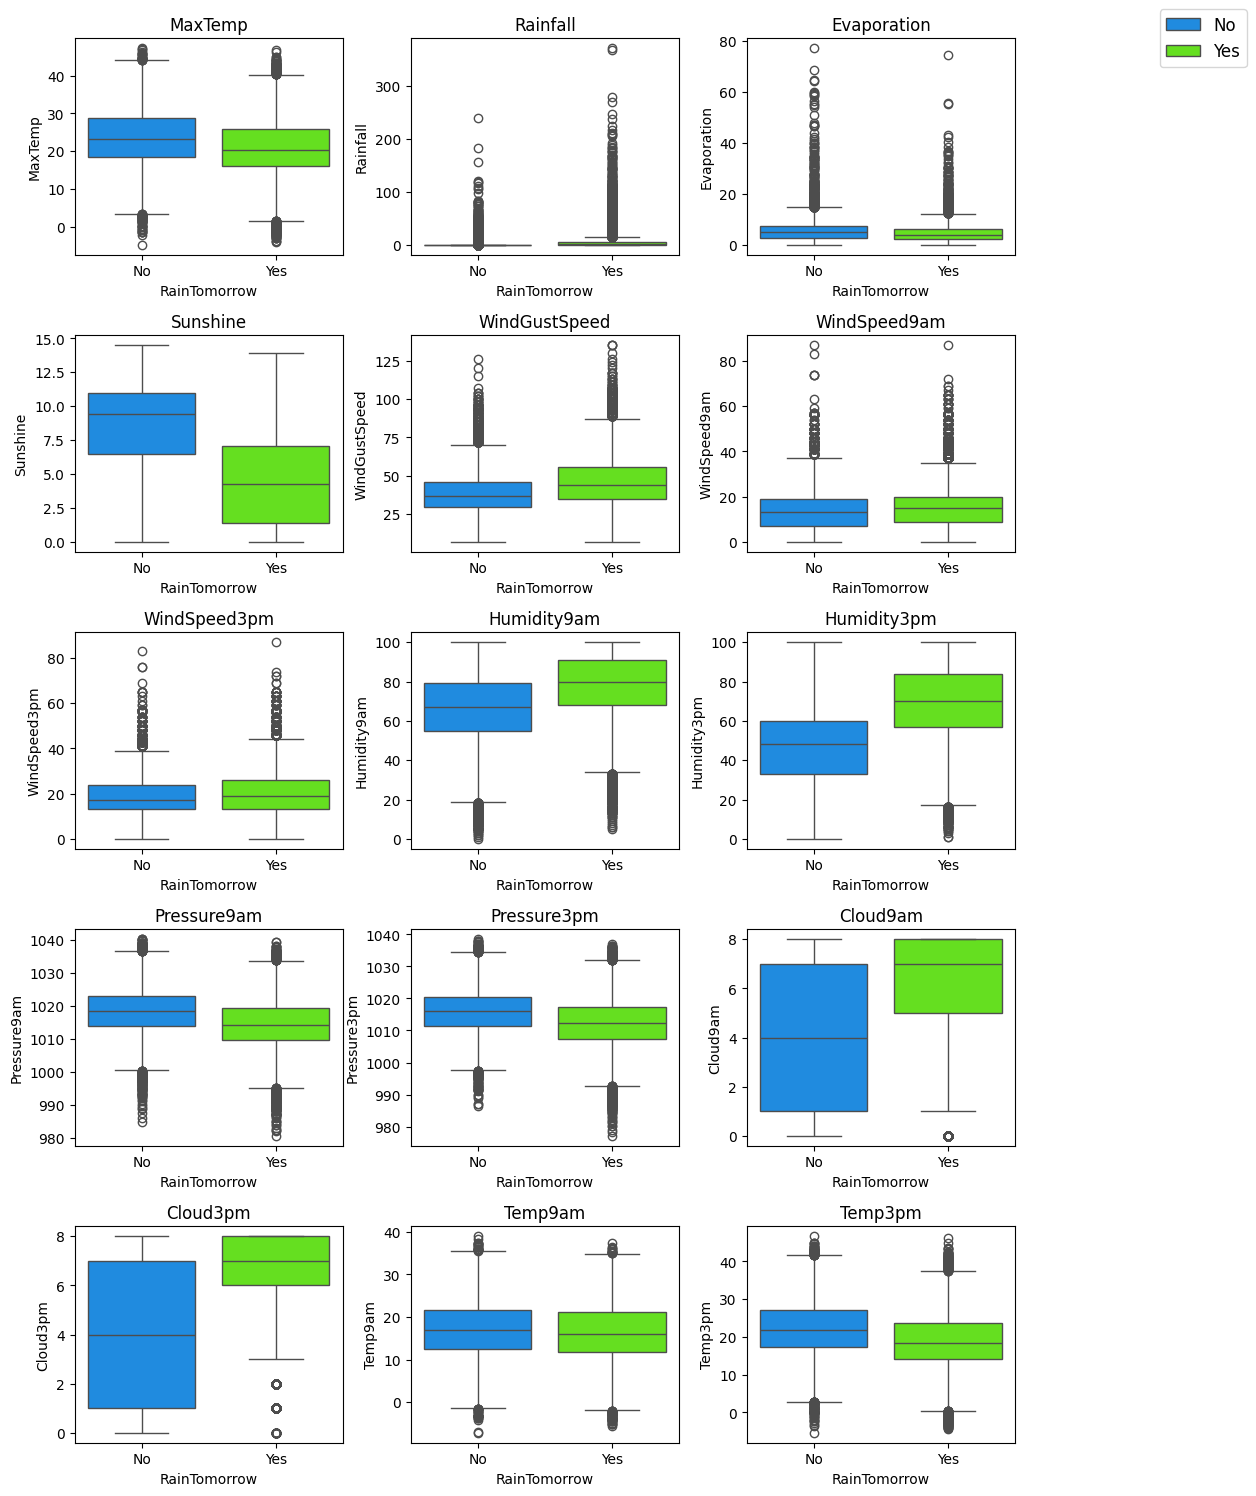

In [168]:
n_cols = 3
n_rows = (len(var_num[1:]) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3), dpi=100)
axes = axes.flatten() 

for idx, variable in enumerate(var_num[1:]):
    sns.boxplot(data=data, x='RainTomorrow', hue='RainTomorrow', y=variable, palette='gist_rainbow_r', ax=axes[idx])
    axes[idx].set_title(f'{variable}')
    axes[idx].set_xlabel('RainTomorrow')
    axes[idx].set_ylabel(variable)
    axes[idx].legend().remove()

for ax in axes[len(var_num[1:]):]:
    ax.set_visible(False)  

handles, labels = axes[0].get_legend_handles_labels()  
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1), fontsize='large')

plt.tight_layout()
plt.subplots_adjust(right=0.85) 
plt.show()

#### 1.2.3 Matriu de correlació

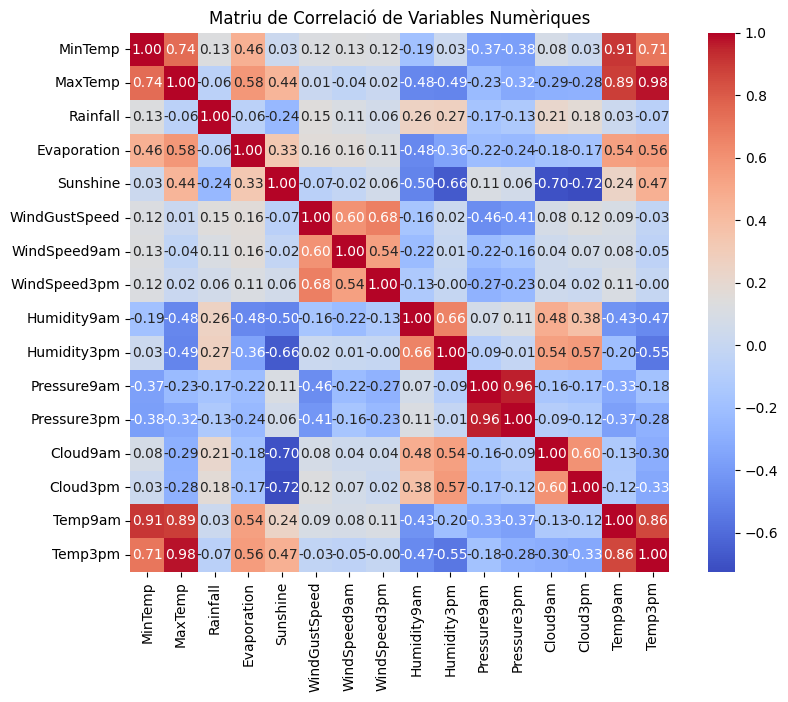

In [169]:
corr_matrix = data[var_num].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriu de Correlació de Variables Numèriques')
plt.show()

De les variables que tenen una correlació superior a 0.5 (correlació positiva) o inferior a -0.5 (correlació negativa), visualitzem un scatter plot. 

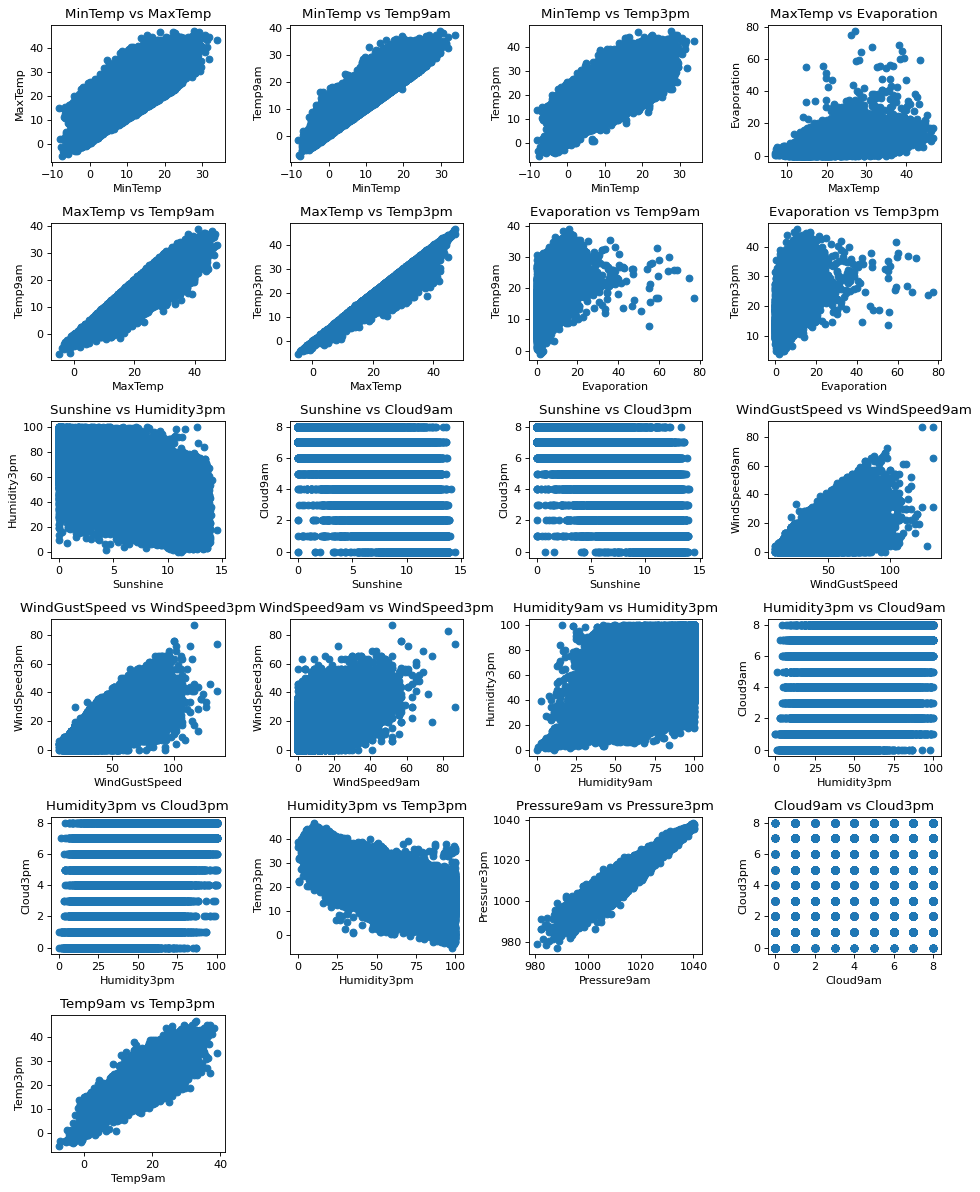

In [170]:
corr_matrix = data[var_num].corr().abs()

umbral_correlacion = 0.5
parejas_alta_corr = np.where((np.triu(corr_matrix.values, k=1) < -umbral_correlacion) | (np.triu(corr_matrix.values, k=1) > umbral_correlacion))

indices_fila = parejas_alta_corr[0]
indices_columna = parejas_alta_corr[1]

num_graficos = len(indices_fila)
n_cols = 4  
n_rows = (num_graficos + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 2.5 * n_rows), dpi=80) 
axes = axes.flatten() 

for idx, (fila, columna) in enumerate(zip(indices_fila, indices_columna)):
    variable_x = corr_matrix.columns[fila]
    variable_y = corr_matrix.index[columna]

    axes[idx].scatter(data[variable_x], data[variable_y])
    axes[idx].set_title(f'{variable_x} vs {variable_y}')
    axes[idx].set_xlabel(variable_x)
    axes[idx].set_ylabel(variable_y)

for ax in axes[num_graficos:]:
    ax.set_visible(False)  

plt.tight_layout()
plt.show()

### 1.2.4 Anàlisi de redundància

Mitjançant el test de Chi-quadrat, es decidirà si les variables categòriques aporten informació rellevant per  la predicció de la nostra variable objectiu.

In [171]:
import pandas as pd
from scipy.stats import chi2_contingency

categoriques = data.select_dtypes(include=['category', 'object']).columns.tolist()

for var in categoriques:
    contingency_table = pd.crosstab(data[var], data['RainTomorrow'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    if p < 0.05:
        relevance = "Rellevant"
    else:
        relevance = "No rellevant"

    print(f"Chi-square test for {var}: chi2 = {chi2}, p-value = {p}, Relevance: {relevance}")


Chi-square test for Date: chi2 = 11119.607714894802, p-value = 0.0, Relevance: Rellevant
Chi-square test for Location: chi2 = 2415.678336293762, p-value = 0.0, Relevance: Rellevant
Chi-square test for WindGustDir: chi2 = 971.9961979403071, p-value = 1.3506248993834652e-197, Relevance: Rellevant
Chi-square test for WindDir9am: chi2 = 1413.5083205121614, p-value = 2.0544079644459983e-292, Relevance: Rellevant
Chi-square test for WindDir3pm: chi2 = 851.6414955468024, p-value = 7.814567692064555e-172, Relevance: Rellevant
Chi-square test for RainToday: chi2 = 7169.769628578961, p-value = 0.0, Relevance: Rellevant
Chi-square test for RainTomorrow: chi2 = 63750.000062741165, p-value = 0.0, Relevance: Rellevant


Veiem que totes les variables categòriques són rellevants per a la predicció de la nostra variable objectiu ja que tenen un p-valor inferior a 0.05.

## 2. ESTRATÈGIA DE PREPROCESSAMENT

### 2.1 Recodificació de variables categòriques

Primer de tot, tractem les variables que tenen un alt nombre de categories.

#### 2.1.1 Variable Date 

S'ha decidt partir aquesta variable en tres diferents que ens indicaran el dia (day), el mes (month) i l'any (year) ja que a la variable Date es troba una codificació de: any-mes-dia.

In [64]:
data['Date']= pd.to_datetime(data["Date"])

data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month
data['day'] = data.Date.dt.day

Visualitzem els barplots d'aquestes noves variables creades:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

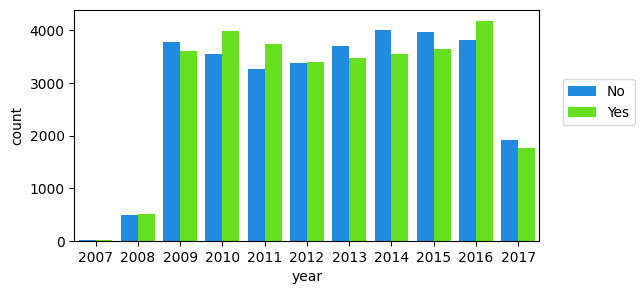

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

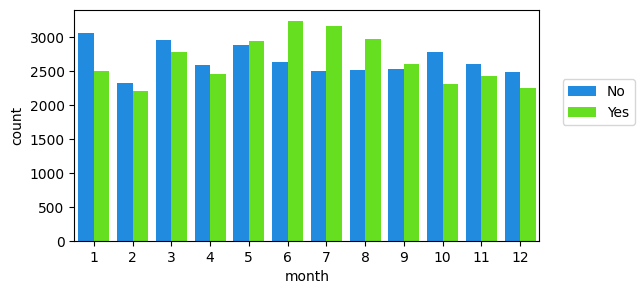

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

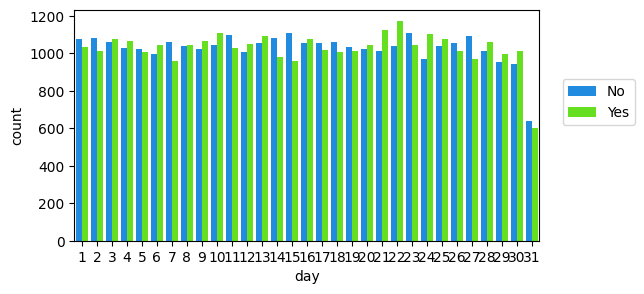

In [107]:
variables_temporals = ['year', 'month', 'day']
for variable in variables_temporals:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.countplot(data=data, x=variable, hue='RainTomorrow', palette='gist_rainbow_r')
    plt.legend(loc=(1.05, 0.5))
    plt.show()

In [65]:
data = data.drop(columns=['Date'])

#### 2.1.2 Location 

Per reduir el nombre de categories d'aquesta variable, dividirem les ciutats per estats en Australia

In [66]:
#Creem un diccionari on les claus son els estats i els valors són les ciutats que pertanyen a aquell estat

ciutats_per_estat = {
    'New South Wales': ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle',
                        'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport',
                        'WaggaWagga', 'Williamtown', 'Wollongong'],
    'Australian Capital Territory': ['Canberra', 'Tuggeranong', 'MountGinini'],
    'Victoria': ['Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne',
                 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor'],
    'Queensland': ['Brisbane', 'Cairns', 'GoldCoast', 'Townsville'],
    'South Australia': ['Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera'],
    'Western Australia': ['Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole'],
    'Tasmania': ['Hobart', 'Launceston'],
    'Northern Territory': ['AliceSprings', 'Darwin', 'Katherine', 'Uluru']
}

In [67]:
ciutat_a_estat = {}
for estat, ciutats in ciutats_per_estat.items():
    for ciutat in ciutats:
        ciutat_a_estat[ciutat] = estat

In [68]:
data['State'] = data['Location'].map(ciutat_a_estat)
print(data['State'].value_counts())

      Location               State
0       Albury     New South Wales
1       Albury     New South Wales
2       Albury     New South Wales
3       Albury     New South Wales
4       Albury     New South Wales
...        ...                 ...
67016    Uluru  Northern Territory
67017    Uluru  Northern Territory
67018    Uluru  Northern Territory
67019    Uluru  Northern Territory
67020    Uluru  Northern Territory

[67021 rows x 2 columns]
New South Wales                 21248
Victoria                        13643
Western Australia               10213
Queensland                       5684
South Australia                  5335
Australian Capital Territory     4218
Northern Territory               3833
Tasmania                         2847
Name: State, dtype: int64


In [69]:
# Eliminem la variable Location inicial
data.drop('Location', axis=1, inplace=True)

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0     12.9     25.7       0.0          NaN       NaN         WSW   
1     14.6     29.7       0.2          NaN       NaN         WNW   
2      9.7     31.9       0.0          NaN       NaN         NNW   
3     13.4     30.4       0.0          NaN       NaN           N   
4     15.9     21.7       2.2          NaN       NaN         NNE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Cloud9am  Cloud3pm  \
0           46.0          W        WSW          19.0  ...       NaN       2.0   
1           56.0          W          W          19.0  ...       NaN       NaN   
2           80.0         SE         NW           7.0  ...       NaN       NaN   
3           30.0        SSE        ESE          17.0  ...       NaN       NaN   
4           31.0         NE        ENE          15.0  ...       8.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  \
0     21.0     23.2         No        

#### 2.2.3 Wind direction: 'WindGustDir', 'WindDir9am', 'WindDir3pm'

Com en el cas anterior, perque les variables que indiquen la direcció del vent no tinguin tantes categories i siguin més simples, s'ha decidit modificar les seves categories unicament als 4 punts cardinals bàsics: Sud, Nord, Est i Oest

In [70]:
def simplificar_direccio(dir: str):

    """
    Simplifica la direcció del vent donada per una cardinal bàsica (Nord, Sud, Est, Oest)
    """

    if dir in ['N', 'NNE', 'NE', 'ENE']:
        return 'N'
    elif dir in ['S', 'SSW', 'SW', 'WSW']:
        return 'S'
    elif dir in ['E', 'ESE', 'SE', 'SSE']:
        return 'E'
    elif dir in ['W', 'WNW', 'NW', 'NNW']:
        return 'O'
    else:
        return np.nan  

In [71]:
data['WindGustDir'] = data['WindGustDir'].apply(simplificar_direccio)
data['WindDir9am'] = data['WindDir9am'].apply(simplificar_direccio)
data['WindDir3pm'] = data['WindDir3pm'].apply(simplificar_direccio)

In [72]:
print(data['WindGustDir'].unique())
print(data['WindDir9am'].unique())
print(data['WindDir3pm'].unique())

['S' 'O' 'N' nan 'E']
['O' 'E' 'N' 'S' nan]
['S' 'O' 'E' 'N' nan]


#### 2.2.4 One-Hot Encoding

Un cop fets tots els canvis, recodificarem les variables categòriques del dataset utilitzant one-hot encoding per poder-les utilitzar als models que realitzarem posteriorment.

In [73]:
from typing import Tuple, List

def recodificacio_one_hot(X_train: np.ndarray, X_test: np.ndarray, categoriques: List[str], numeriques: List[str]) -> Tuple[np.ndarray, np.ndarray]:
    
    """
    Aplica One-hot encoding a les columnes categòriques del conjunt de dades
    de train i test. 

    Retorna els dos arrays amb les columnes categòriques recodificades. 
    """
    
    encoder = OneHotEncoder(sparse_output=False)
    train_encoded = encoder.fit_transform(X_train[categoriques])
    test_encoded = encoder.transform(X_test[categoriques])
    X_train_combined = np.concatenate((X_train[numeriques], train_encoded), axis=1)
    X_test_combined = np.concatenate((X_test[numeriques], test_encoded), axis=1)
    return X_train_combined, X_test_combined

### 2.2 Identificació i tractament d'outliers

A continuació es farà un estudi detallat dels valors atípics i es farà un tractament d'aquests.

Primer de tot, visualitzem els boxplots útils per les variables numèriques que segueixen una distribució normal i d'aquesta manera observarem els outliers d'aquestes variables.

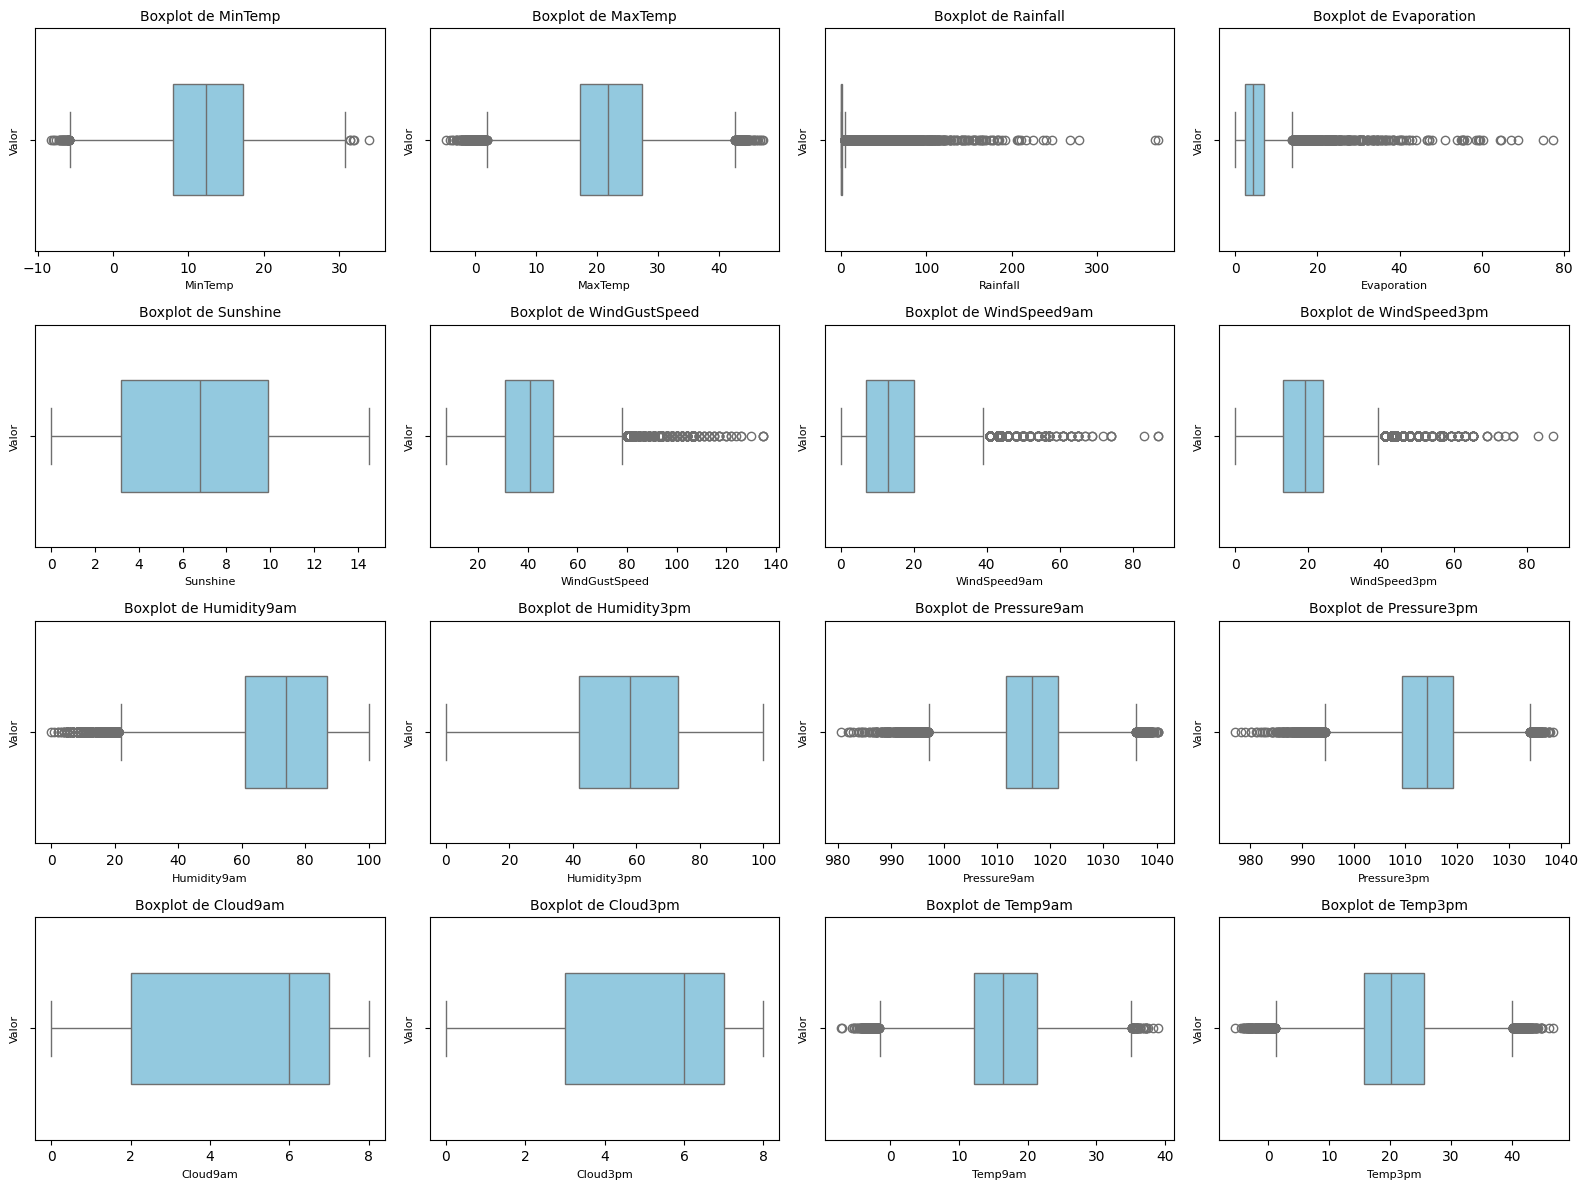

In [183]:
n_cols = 4 
n_rows = (len(var_num) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))  
axes = axes.flatten()  

for idx, columna in enumerate(var_num):
    sns.boxplot(x=data[columna], color='skyblue', width=0.5, ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {columna}', fontsize=10)
    axes[idx].set_xlabel(columna, fontsize=8)
    axes[idx].set_ylabel('Valor', fontsize=8)

for ax in axes[len(var_num):]:
    ax.set_visible(False)  

plt.tight_layout()
plt.show()

Seguidament, realitzem una taula on s'indica informació sobre els outliers de totes les variables numèriques.

In [74]:
def resum_outliers(data: pd.DataFrame, var_num:list) -> None:

    """ 
    Fa un resum dels valors atípics les columnes numèriques del DataFrame
    """

    outliers_summary = pd.DataFrame(columns=['Variable', 'Lower Outlier Threshold', 'Upper Outlier Threshold', 'Min Value', 'Max Value', 'Number of Outliers'])
    
    for column in var_num:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
        
        min_value = data[column].min()
        max_value = data[column].max()
        num_outliers = outliers.count()
        new_row = pd.DataFrame({
            'Variable': [column],
            'Lower Outlier Threshold': [lower_bound],
            'Upper Outlier Threshold': [upper_bound],
            'Min Value': [min_value],
            'Max Value': [max_value],
            'Number of Outliers': [num_outliers]
        })
        outliers_summary = pd.concat([outliers_summary, new_row], ignore_index=True)

    outliers_summary_str = outliers_summary.to_string(index=False)
    separator = '-' * len(outliers_summary_str.split('\n')[0])
    print(separator)
    print(outliers_summary_str.replace('\n', '\n' + separator + '\n'))

In [124]:
resum_outliers(data, var_num)

--------------------------------------------------------------------------------------------------------
     Variable  Lower Outlier Threshold  Upper Outlier Threshold  Min Value  Max Value Number of Outliers
--------------------------------------------------------------------------------------------------------
      MinTemp                    -5.80                    31.00       -8.2       33.9                 42
--------------------------------------------------------------------------------------------------------
      MaxTemp                     1.90                    42.70       -4.8       47.3                317
--------------------------------------------------------------------------------------------------------
     Rainfall                    -3.30                     5.50        0.0      371.0              10500
--------------------------------------------------------------------------------------------------------
  Evaporation                    -4.50                 

/var/folders/3l/_d7xdffd13dgghrq79vfcbym0000gn/T/ipykernel_4178/1876728539.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_summary = pd.concat([outliers_summary, new_row], ignore_index=True)


Un cop visualitzats els outliers de cada variable numèrica procedim a borrar els més extrems i els que amb investigació prèvia, sembla que puguin ser erronis o massa extrems.

In [75]:
outliers_rainfall = data[data['Rainfall'] > 250].index
count_rainfall = len(outliers_rainfall)

outliers_evaporation = data[(data['Evaporation'] > 20)].index
count_evaporation = len(outliers_evaporation)

outliers_windgust = data[(data['WindGustSpeed'] > 100)].index
count_windgust = len(outliers_windgust)

data = data.drop(outliers_rainfall.union(outliers_evaporation).union(outliers_windgust))

total_outliers_removed = count_rainfall + count_evaporation + count_windgust

print('Outliers totals eliminats: ', total_outliers_removed)

Outliers totals eliminats:  310


### 2.3 Identifiació i tractament de missing values

Realitzem una taula per identificar el percentatge de missings que té cada variable.

In [76]:
def identificacio_missings(dataframe: pd.DataFrame) -> None:

    """ 
    Es realitza una exploració de les dades, imprimint detalls de l'estructura de
    dades i un resum dels valors faltants de cada variable.
    """

    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)

In [77]:
identificacio_missings(data)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (66712, 25)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66712 entries, 0 to 67020
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        65558 non-null  float64
 1   MaxTemp        65633 non-null  float64
 2   Rainfall       63966 non-null  float64
 3   Evaporation    37325 non-null  float64
 4   Sunshine       34700 non-null  float64
 5   WindGustDir    61233 non-null  object 
 6   WindGustSpeed  61275 non-null  float64
 7   WindDir9am     61966 non-null  object 
 8   WindDir3pm     64430 non-null  object 
 9   WindSpeed9am   65665 non-null  float64
 10  WindSpeed3pm   65025 non-null  float64
 11  Humidity9am    64956 non-null  float64
 12  Humidity3pm    64092 non-null  float64
 13  Pressure9am    59453 non-null  floa

Seguidament, realitzem un grafic per visualitzar les files que contenen els missing values.

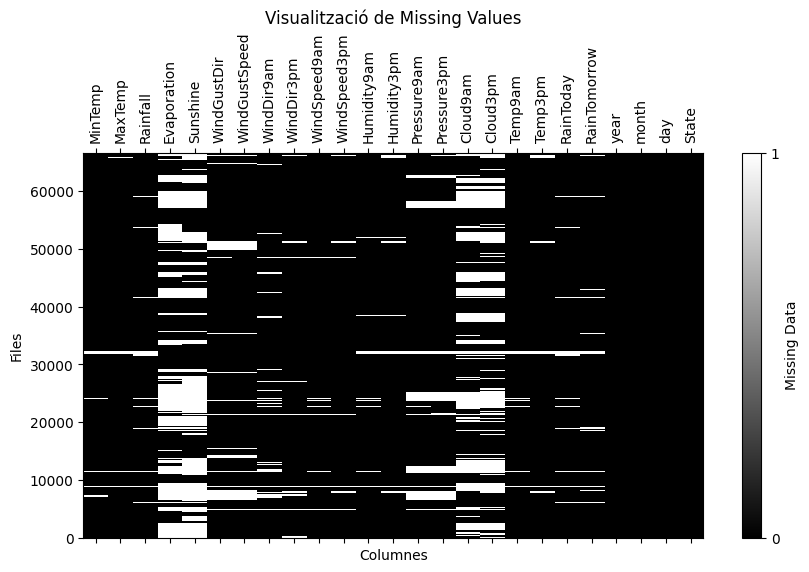

In [82]:
missing_mask = data.isnull().astype(int)

fig, ax = plt.subplots(figsize=(10, 5))
cax = ax.matshow(missing_mask, cmap='gray', aspect='auto')
fig.colorbar(cax, ticks=[0, 1], label='Missing Data')

ax.set_xlabel('Columnes')
ax.set_ylabel('Files')
ax.set_title('Visualització de Missing Values')

ax.set_xticks(np.arange(len(data.columns)))
ax.set_xticklabels(data.columns, rotation=90)

ax.set_ylim(-0.5, len(missing_mask)-0.5)

plt.show()


Borrem les files que tenen missing data a RainTomorrow perquè no podrem predir la variable si no sabem el seu valor real. 

In [84]:
data = data.dropna(subset=['RainTomorrow'])

Borrem les files que tenen missing data de la variable que té un major valor de missing data.

In [85]:
data = data.dropna(subset=['Sunshine'])

Realitzem la taula posteriorment a l'eliminació dels valors faltants per identificar el percentatge de missings que caldrà imputar.

In [86]:
identificacio_missings(data)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (33455, 25)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33455 entries, 2683 to 65764
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        33405 non-null  float64
 1   MaxTemp        33431 non-null  float64
 2   Rainfall       33173 non-null  float64
 3   Evaporation    31637 non-null  float64
 4   Sunshine       33455 non-null  float64
 5   WindGustDir    31253 non-null  object 
 6   WindGustSpeed  31267 non-null  float64
 7   WindDir9am     32349 non-null  object 
 8   WindDir3pm     33114 non-null  object 
 9   WindSpeed9am   33362 non-null  float64
 10  WindSpeed3pm   33254 non-null  float64
 11  Humidity9am    33252 non-null  float64
 12  Humidity3pm    33156 non-null  float64
 13  Pressure9am    33394 non-null  f

(33455, 25)

Es probaran diferents tècniques d'imputació per veure quina és més eficaç: KNN i MICE

Funció d'imputació:

In [87]:
def imputacio_missings(X_train, X_test, metode = None):
    
    """
    Aplica la imputació desitjada als valors faltants del conjunt de dades.
    """

    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()

    if metode == 'knn':
        imputer = KNNImputer(n_neighbors=5)
        X_train_imputat = imputer.fit_transform(X_train_copy)
        X_test_imputat = imputer.transform(X_test_copy)
        
    elif metode == 'mice':
        imputer = IterativeImputer(max_iter=10, random_state=0)
        X_train_imputat = imputer.fit_transform(X_train_copy)
        X_test_imputat = imputer.transform(X_test_copy)
    
    else:
        X_train_imputat = X_train_copy
        X_test_imputat = X_test_copy
    
    return X_train_imputat, X_test_imputat



### 2.4 Balanceig de les dades

A l'anàlisi univariant i bivariant ja hem vist que la nostra variable a predir està molt balancejada

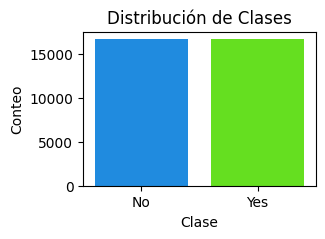

In [27]:
data['RainTomorrow'].value_counts()

plt.figure(figsize=(3, 2))
sns.countplot(x='RainTomorrow', hue='RainTomorrow', data=data, palette="gist_rainbow_r")
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()


Per tant, no cal utilitzar cap tècnica de oversampling o undersampling. 

### 2.5 Normalització de les dades

S'ha probat de normalitzar les dades amb dos mètodes diferents: MinMax i StandardScaler

Funció de normalització:

In [28]:
def normalitzacio_dades(X_train, X_test, metode=None):

    """
    Normalitza el conjunt de dades d'entrenament i el de proba fent servir el mètode
    d'escalat específicat. Retorna els dos conjunt de dades normalitzats. 
    """
    
    if metode == 'standard':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled
    
    elif metode == 'minmax':
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled
    
    else:
        return X_train, X_test

## 3. REMOSTREIG

Com a model lineal es fa una regressió logística ja que la nostra variable objectiu és binària.

Funció de partició de dades:

In [29]:
def particio_dades(data):

    """
    Divideix conjunt de dades en un d'entrenament (70%) i un de proba (30%), 
    utilitzant RainTomorrow com a variable objectiu
    """
    
    X = data.copy()
    X = X.drop('RainTomorrow', axis=1)
    y = data['RainTomorrow']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return  X_train, X_test, y_train, y_test

Visualitzarem els resultats mitjançant una matriu de confusió, una corba roc i altres mètriques

In [30]:
def visualitzar_matriu_confusio(y_test, y_pred):

    """ Fa la matriu de confusió dels resultats del model """

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriu de Confusió')
    plt.xlabel('Prediccions')
    plt.ylabel('Valores Reals')
    plt.show()

In [109]:
def visualitzar_corba_roc(y_test, y_pred):

    """ Fa la corba ROC dels resultats del model """

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [34]:
def calcul_metriques(y_pred, y_true):

    """
    Fa i mostra el càlcul de la Precisió, Recall, F1-score i Accuracy del model
    """

    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    accuracy = accuracy_score(y_true, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("Accuracy:", accuracy)
    return precision, recall, f1, accuracy


Creem un DataFrame per guardar els resultats de tots els models que entrenem

In [101]:
resultats_models = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])

In [36]:
def afegir_resultats(model_name, accuracy, f1_score, recall, precision, dataframe):

    """
    Donat el nom d'un model i els seus resultats, els afegeix al DataFrame on es 
    guarda la comparació de resultats. 
    """

    new_row = pd.DataFrame({
        'Model Name': [model_name],
        'Accuracy': [accuracy],
        'F1 Score': [f1_score],
        'Recall': [recall],
        'Precision': [precision]
    })

    updated_dataframe = pd.concat([dataframe, new_row], ignore_index=True)
    return updated_dataframe


Funció de preprocessament:

In [37]:
def preprocessament(data, escalat = 'minmax', imputacio = 'knn'):

    """ 
    Realitza el preprocessament complet del conjunt de dades:
    - Partició de les dades
    - Recodificació de variables categòriques
    - Normalització de dades
    - Imputació de valors faltants
    """

    X_train, X_test, y_train, y_test = particio_dades(data)

    encoder = LabelEncoder()
    y_train_encoded = encoder.fit_transform(y_train)
    y_test_encoded = encoder.transform(y_test)
    
    numeriques = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categoriques = X_train.select_dtypes(include=['category', 'object']).columns.tolist()

    X_train_encoded, X_test_encoded = recodificacio_one_hot(X_train, X_test, categoriques, numeriques)
    X_train_encoded, X_test_encoded = normalitzacio_dades(X_train_encoded, X_test_encoded, escalat)
    X_train_imputed, X_test_imputed = imputacio_missings(X_train_encoded, X_test_encoded, imputacio)

    return X_train_imputed, X_test_imputed, y_train_encoded, y_test_encoded

Funció d'entrenament del model:

In [119]:
def entrenament_linearmodel(data, model, nom, resultats_models, parametres=None, escala = 'minmax', imputacio = 'knn'):
    
    """
    Entrena un model lineal fent ús de les nostres dades preprocessades. 
    En el cas de que es puguin triar hiperparàmetres, es fa una validació creuada per 
    trobar el millor hiperparàmetre i finalment s'evalua el model. 
    """

    X_train, X_test, y_train, y_test = preprocessament(data, escala, imputacio)

    if parametres:
        grid_search = GridSearchCV(model, parametres, cv=5, scoring='f1')
        grid_search.fit(X_train, y_train)
        print("Millors paràmetres:", grid_search.best_params_)
        print("Millor F1 score en CV:", grid_search.best_score_)
        model = grid_search.best_estimator_

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_predroc = model.decision_function(X_test)

    precision, recall, f1, accuracy = calcul_metriques(y_pred, y_test)
    visualitzar_matriu_confusio(y_test, y_pred)
    visualitzar_corba_roc(y_test, y_pred_roc)
    resultats_models = afegir_resultats(nom, accuracy, f1, recall, precision, resultats_models)

    return resultats_models


## 4. MODEL LINEAL BASE

### Logistic Regression

Sense fer ús d'hiperparàmetres

Precision: 0.8073150796894156
Recall: 0.7935328379192609
F1-Score: 0.8003646308113036
Accuracy: 0.8036265816479028


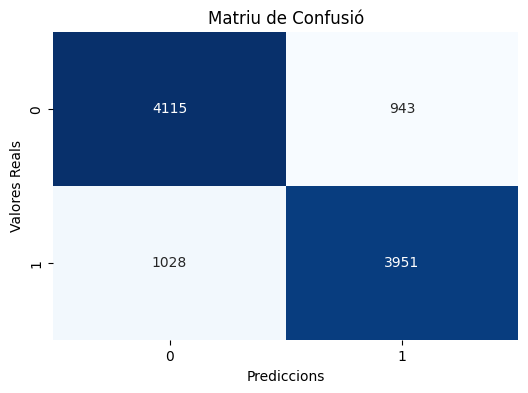

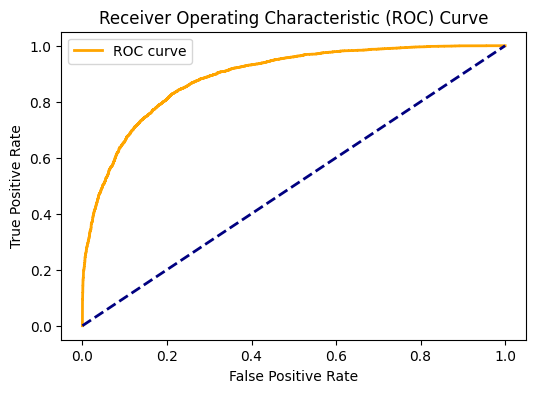

         Model Name  Accuracy  F1 Score    Recall  Precision
0  LinearRegression  0.803627  0.800365  0.793533   0.807315
1  LinearRegression  0.803627  0.800365  0.793533   0.807315
2  LinearRegression  0.803627  0.800365  0.793533   0.807315
3  LinearRegression  0.803627  0.800365  0.793533   0.807315
4  LinearRegression  0.803627  0.800365  0.793533   0.807315


In [113]:
model = LogisticRegression()
resultats_models = entrenament_linearmodel(data, model, 'LinearRegression',resultats_models, parametres=None, escala = 'minmax', imputacio = 'knn')
print(resultats_models)

Amb la búsqueda d'hiperparàmetres mitjançant GridSearch

Millors paràmetres: {'C': 100, 'penalty': 'l1'}
Millor F1 score en CV: 0.7998412758295823
Precision: 0.8097390589685638
Recall: 0.79152440249046
F1-Score: 0.800528133252082
Accuracy: 0.8043240011955763


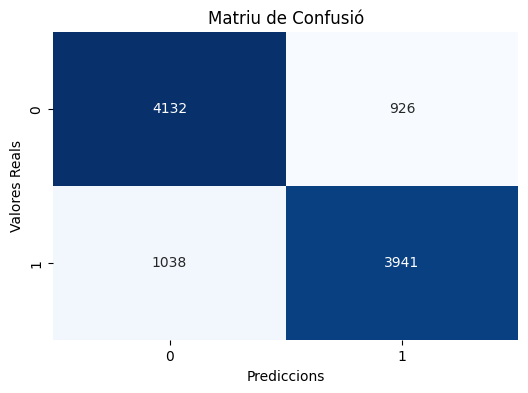

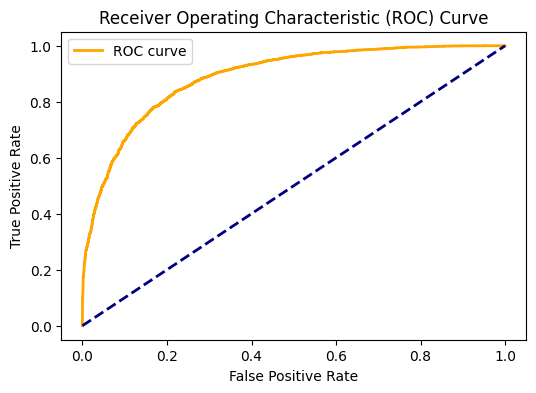

            Model Name  Accuracy  F1 Score    Recall  Precision
0     LinearRegression  0.803627  0.800365  0.793533   0.807315
1     LinearRegression  0.803627  0.800365  0.793533   0.807315
2     LinearRegression  0.803627  0.800365  0.793533   0.807315
3     LinearRegression  0.803627  0.800365  0.793533   0.807315
4     LinearRegression  0.803627  0.800365  0.793533   0.807315
5  LinearRegressionReg  0.804324  0.800528  0.791524   0.809739


In [114]:
model = LogisticRegression(solver='liblinear')

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Valors per la regularització: afegir valors 10 i 100
    'penalty': ['l1', 'l2']  # Tipus de penalització
}

resultats_models = entrenament_linearmodel(data, model, 'LinearRegressionReg', resultats_models, parametres=param_grid, escala = 'minmax', imputacio = 'knn')
print(resultats_models)



### Random Forest

Millors paràmetres: {'max_depth': 20, 'n_estimators': 300}
Millor F1 score en CV: 0.815953484678283
Precision: 0.811942074985122
Recall: 0.8220526210082346
F1-Score: 0.8169660678642715
Accuracy: 0.8172760785095148


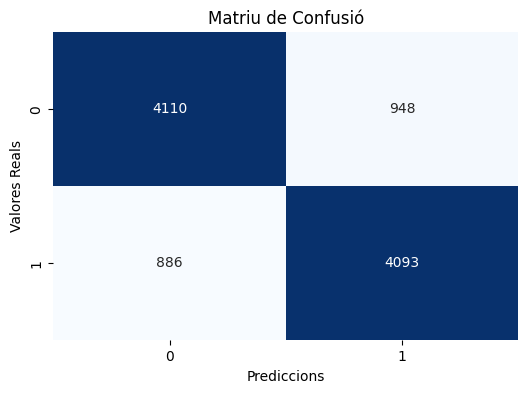

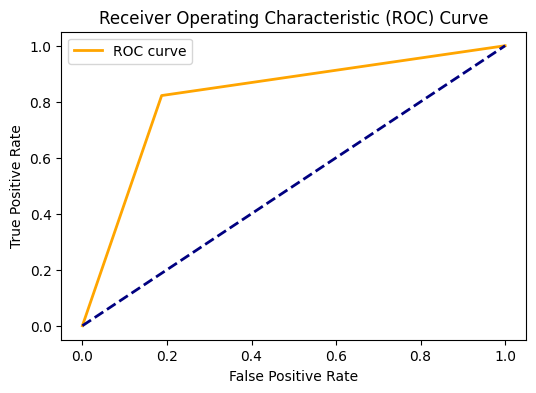

            Model Name  Accuracy  F1 Score    Recall  Precision
0     LinearRegression  0.803627  0.800365  0.793533   0.807315
1     LinearRegression  0.803627  0.800365  0.793533   0.807315
2     LinearRegression  0.803627  0.800365  0.793533   0.807315
3     LinearRegression  0.803627  0.800365  0.793533   0.807315
4     LinearRegression  0.803627  0.800365  0.793533   0.807315
5  LinearRegressionReg  0.804324  0.800528  0.791524   0.809739
6         RandomForest  0.816778  0.815897  0.818437   0.813373
7         RandomForest  0.819269  0.818636  0.822253   0.815051
8         RandomForest  0.817276  0.816966  0.822053   0.811942


In [126]:
model = RandomForestClassifier()
parametres = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

resultats_models = entrenament_linearmodel(data, model,'RandomForest', resultats_models, parametres=parametres, escala = 'minmax', imputacio = 'knn')
print(resultats_models)

# 5. PERCEPTRÓ MULTICAPA

Entrenarem diferents models del MLP canviant diferents paràmetres:

- Optimizers: o Adam o SGD
- Learning rate
- Nombre de epochs
- Regularització: l1 o l2
- Nombre de capes
- Nombre de neurones per capa
- Drop out de les neurones

In [42]:
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training Accuracy')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation Accuracy')
  axes[1].set_title('Training and Validation Accuracy')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('Accuracy')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

Preprocessem les dades previament a executar el model MLP.

In [43]:
datos = data.copy()
X_train, X_test, y_train, y_test = preprocessament(datos)

Funció per entrenar el model:

In [44]:
def entrenament_MLP(X_train, y_train, layers_info, optimizer_info, num_epochs = 100, batch_size = 16, validation_split = 0.1):
    
    """
    Entrena un Perceptró Multicapa donada la informació 
    sobre cada capa (dropout, regularització), el tipus d'optimització i el 
    nombre de epochs i batch_size. 
    
    Retorna el model entrenat i les dades del procés d'entrenament.
    """
    
    model = Sequential()
    for layer in layers_info:
        regularizer = None
        if 'regularizer' in layer:
            regularizer = l1_l2(l1=layer['regularizer'].get('l1', 0), l2=layer['regularizer'].get('l2', 0))
        
        model.add(Dense(layer['neurons'], activation=layer['activation'], kernel_regularizer=regularizer))
        
        if 'dropout' in layer:
            model.add(Dropout(rate=layer['dropout']))

    if optimizer_info['type'] == 'adam':
        optimizer = Adam(learning_rate=optimizer_info['learning_rate'])
    elif optimizer_info['type'] == 'sgd':
        optimizer = SGD(learning_rate=optimizer_info['learning_rate'], momentum=optimizer_info.get('momentum', 0), nesterov=optimizer_info.get('nesterov', False))

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=validation_split, verbose=2)

    return model, history


Funció per avaluar el model:

In [140]:
def evaluacio_MLP(X_test, y_test, model, history):

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1) if model.output_shape[-1] > 1 else (y_pred > 0.5).astype("int32")

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    plot_curves(history)
    
    precision = precision_score(y_test, y_pred_classes, average='macro')
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    recall = recall_score(y_test, y_pred_classes, average='macro')
    
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)
    print("Test Precision:", precision)
    print("Test F1 Score:", f1)
    print("Test Recall:", recall)
    print('')
    #resultats_models = afegir_resultats(nom_model, accuracy, f1, recall, precision, resultats_models)

    visualitzar_matriu_confusio(y_test, y_pred_classes)  

    return accuracy, f1, recall, precision

In [ ]:
def entrenar_i_evaluar(X_train, y_train, X_test, y_test, layers_info, optimizer_info, num_epochs, batch_size, resultats_models, nom_model, num_runs=3):
    resultats = [[] for _ in range(4)]

    for i in range(num_runs):
        print(f"Entrenamiento {i+1}/{num_runs}")
        model, history = entrenament_MLP(X_train, y_train, layers_info, optimizer_info, num_epochs=num_epochs, batch_size=batch_size, validation_split=0.1)
        
        accuracy, f1, recall, precision = evaluacio_MLP(X_test, y_test, model, history)
        resultats[0].append(accuracy)
        resultats[1].append(f1)
        resultats[2].append(recall)
        resultats[3].append(precision)

    mean_accuracy = np.mean(resultats[0])
    mean_f1 = np.mean(resultats[1])
    mean_recall = np.mean(resultats[2])
    mean_precision = np.mean(resultats[3])
    print(resultats)
    resultats_models = afegir_resultats(nom_model, mean_accuracy, mean_f1, mean_recall, mean_precision, resultats_models)

    return resultats_models

## 7. MODELS REALITZATS (EXPERIMENTS)

### MODEL 1

Començarem amb només una capa, un nombre petit d'epochs i un learning_rate no molt petit

Entrenamiento 1/3
Epoch 1/10
2635/2635 - 4s - loss: 0.5765 - accuracy: 0.7523 - val_loss: 0.5724 - val_accuracy: 0.7652 - 4s/epoch - 1ms/step
Epoch 2/10
2635/2635 - 3s - loss: 0.6033 - accuracy: 0.7547 - val_loss: 0.5027 - val_accuracy: 0.7775 - 3s/epoch - 1ms/step
Epoch 3/10
2635/2635 - 3s - loss: 0.5837 - accuracy: 0.7590 - val_loss: 0.5181 - val_accuracy: 0.7741 - 3s/epoch - 1ms/step
Epoch 4/10
2635/2635 - 3s - loss: 0.5751 - accuracy: 0.7606 - val_loss: 0.7750 - val_accuracy: 0.6874 - 3s/epoch - 1ms/step
Epoch 5/10
2635/2635 - 3s - loss: 0.5815 - accuracy: 0.7557 - val_loss: 0.5204 - val_accuracy: 0.7664 - 3s/epoch - 1ms/step
Epoch 6/10
2635/2635 - 3s - loss: 0.5692 - accuracy: 0.7612 - val_loss: 0.5625 - val_accuracy: 0.7647 - 3s/epoch - 1ms/step
Epoch 7/10
2635/2635 - 3s - loss: 0.5773 - accuracy: 0.7605 - val_loss: 0.6078 - val_accuracy: 0.7477 - 3s/epoch - 1ms/step
Epoch 8/10
2635/2635 - 3s - loss: 0.5731 - accuracy: 0.7571 - val_loss: 0.5027 - val_accuracy: 0.7703 - 3s/epoch -

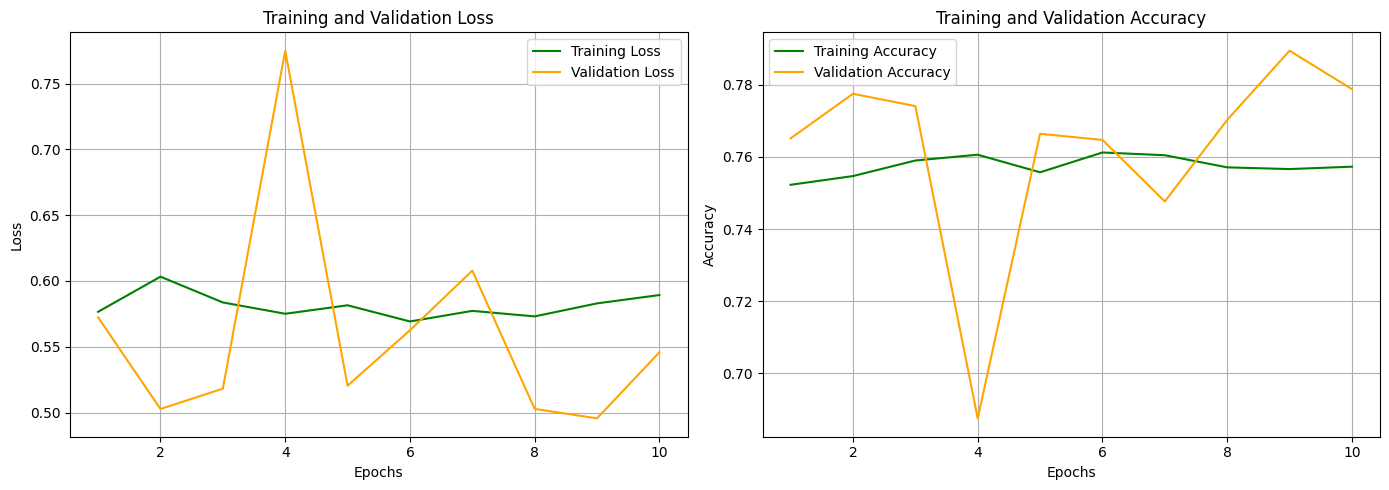

Test Loss: 0.5612626075744629
Test Accuracy: 0.7796154022216797
Test Precision: 0.790981624140486
Test F1 Score: 0.7777522180688696
Test Recall: 0.7803844355069465



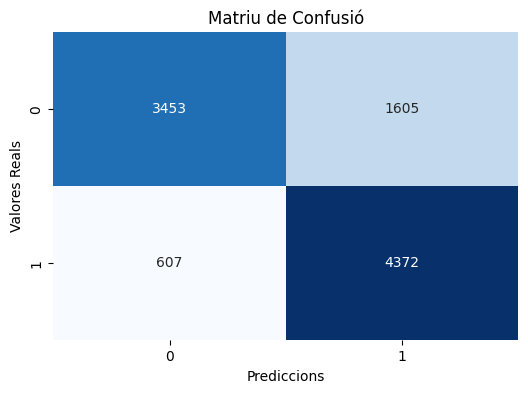

Entrenamiento 2/3
Epoch 1/10
2635/2635 - 4s - loss: 0.5838 - accuracy: 0.7538 - val_loss: 0.6664 - val_accuracy: 0.7357 - 4s/epoch - 1ms/step
Epoch 2/10
2635/2635 - 3s - loss: 0.5718 - accuracy: 0.7597 - val_loss: 0.5879 - val_accuracy: 0.7532 - 3s/epoch - 1ms/step
Epoch 3/10
2635/2635 - 3s - loss: 0.5831 - accuracy: 0.7563 - val_loss: 0.5432 - val_accuracy: 0.7660 - 3s/epoch - 1ms/step
Epoch 4/10
2635/2635 - 3s - loss: 0.5864 - accuracy: 0.7548 - val_loss: 0.5985 - val_accuracy: 0.7498 - 3s/epoch - 1ms/step
Epoch 5/10
2635/2635 - 4s - loss: 0.5873 - accuracy: 0.7564 - val_loss: 0.5864 - val_accuracy: 0.7541 - 4s/epoch - 1ms/step
Epoch 6/10
2635/2635 - 5s - loss: 0.5734 - accuracy: 0.7612 - val_loss: 0.5291 - val_accuracy: 0.7652 - 5s/epoch - 2ms/step
Epoch 7/10
2635/2635 - 5s - loss: 0.5613 - accuracy: 0.7608 - val_loss: 0.5458 - val_accuracy: 0.7728 - 5s/epoch - 2ms/step
Epoch 8/10
2635/2635 - 5s - loss: 0.5731 - accuracy: 0.7603 - val_loss: 0.7281 - val_accuracy: 0.7135 - 5s/epoch -

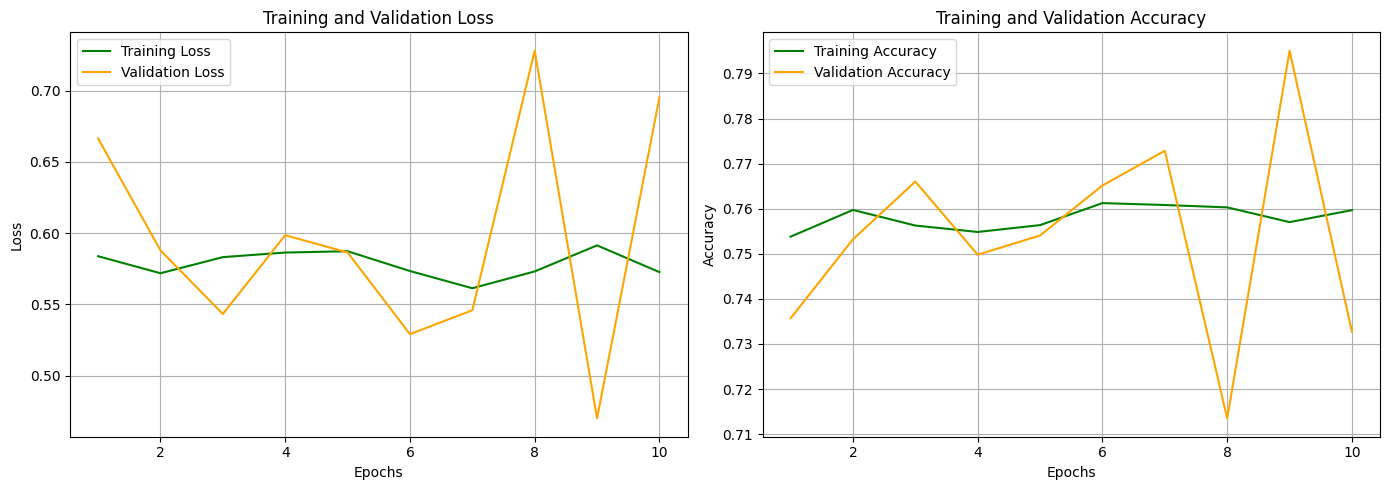

Test Loss: 0.7119669318199158
Test Accuracy: 0.7296004891395569
Test Precision: 0.7755865301546845
Test F1 Score: 0.7187091210286447
Test Recall: 0.7311945441713242



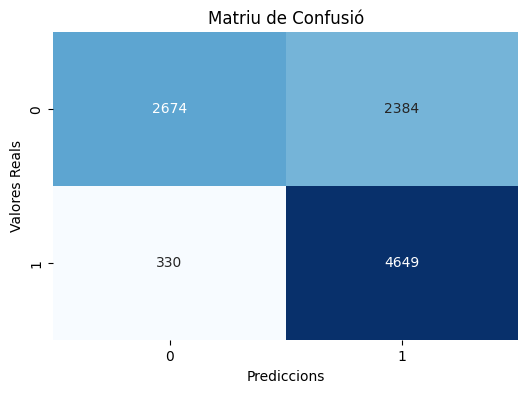

Entrenamiento 3/3
Epoch 1/10
2635/2635 - 4s - loss: 0.5866 - accuracy: 0.7522 - val_loss: 0.5609 - val_accuracy: 0.7677 - 4s/epoch - 1ms/step
Epoch 2/10
2635/2635 - 3s - loss: 0.5613 - accuracy: 0.7610 - val_loss: 0.6157 - val_accuracy: 0.7592 - 3s/epoch - 1ms/step
Epoch 3/10
2635/2635 - 3s - loss: 0.5735 - accuracy: 0.7600 - val_loss: 0.6074 - val_accuracy: 0.7506 - 3s/epoch - 1ms/step
Epoch 4/10
2635/2635 - 3s - loss: 0.5781 - accuracy: 0.7578 - val_loss: 0.5517 - val_accuracy: 0.7656 - 3s/epoch - 1ms/step
Epoch 5/10
2635/2635 - 3s - loss: 0.5795 - accuracy: 0.7581 - val_loss: 0.5548 - val_accuracy: 0.7536 - 3s/epoch - 1ms/step
Epoch 6/10
2635/2635 - 3s - loss: 0.5693 - accuracy: 0.7602 - val_loss: 0.5043 - val_accuracy: 0.7775 - 3s/epoch - 1ms/step
Epoch 7/10
2635/2635 - 3s - loss: 0.5930 - accuracy: 0.7592 - val_loss: 0.4821 - val_accuracy: 0.7942 - 3s/epoch - 1ms/step
Epoch 8/10
2635/2635 - 3s - loss: 0.5731 - accuracy: 0.7595 - val_loss: 0.6064 - val_accuracy: 0.7519 - 3s/epoch -

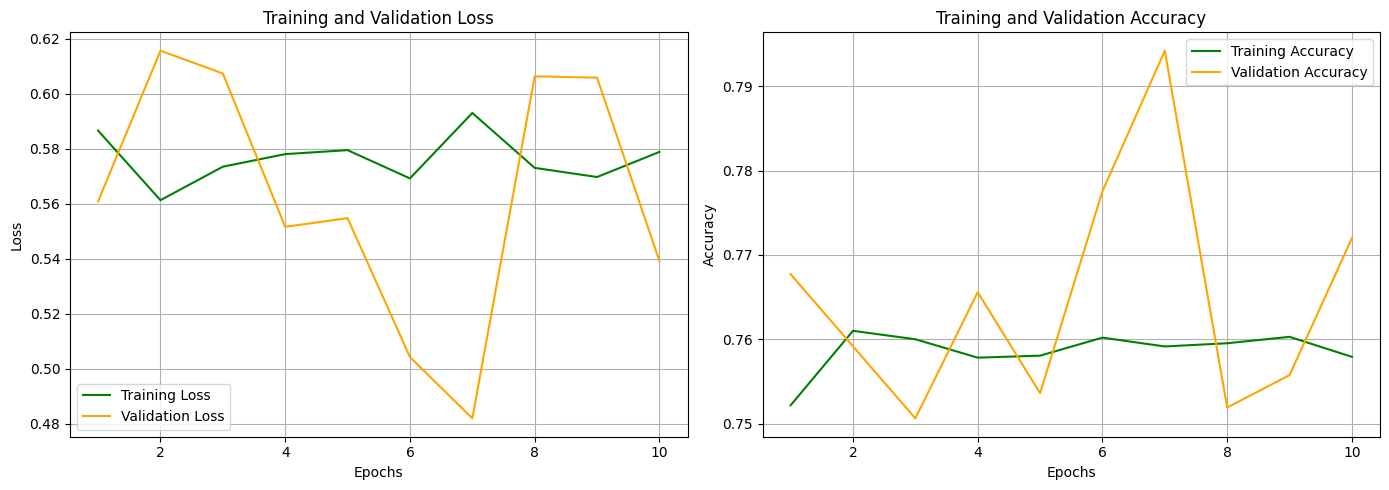

Test Loss: 0.5302382111549377
Test Accuracy: 0.7773239016532898
Test Precision: 0.7820636916799587
Test F1 Score: 0.7761527390109912
Test Recall: 0.7768027058048708



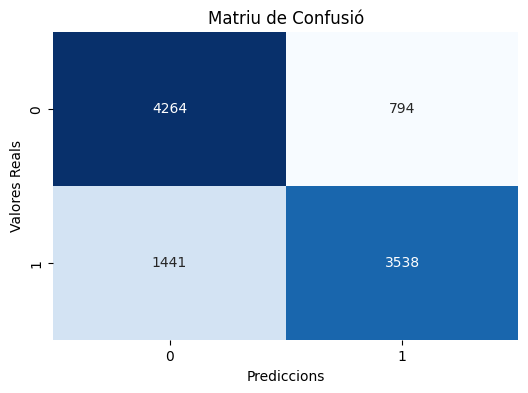

[[0.7796154022216797, 0.7296004891395569, 0.7773239016532898], [0.7777522180688696, 0.7187091210286447, 0.7761527390109912], [0.7803844355069465, 0.7311945441713242, 0.7768027058048708], [0.790981624140486, 0.7755865301546845, 0.7820636916799587]]
             Model Name  Accuracy  F1 Score    Recall  Precision
0      LinearRegression  0.803627  0.800365  0.793533   0.807315
1      LinearRegression  0.803627  0.800365  0.793533   0.807315
2      LinearRegression  0.803627  0.800365  0.793533   0.807315
3      LinearRegression  0.803627  0.800365  0.793533   0.807315
4      LinearRegression  0.803627  0.800365  0.793533   0.807315
5   LinearRegressionReg  0.804324  0.800528  0.791524   0.809739
6          RandomForest  0.816778  0.815897  0.818437   0.813373
7          RandomForest  0.819269  0.818636  0.822253   0.815051
8          RandomForest  0.817276  0.816966  0.822053   0.811942
9                 MLP 1  0.812593  0.812570  0.812556   0.812602
10            MLP FINAL  0.812593  0.

In [145]:
learning_rate = 0.1
optimizer_info = {'type': 'adam', 'learning_rate': learning_rate}
num_epochs = 10
batch_size = 8
layers_info = [{'neurons': 2, 'activation': 'softmax'}]

mean_resultats_models = entrenar_i_evaluar(X_train, y_train, X_test, y_test, layers_info, optimizer_info, num_epochs, batch_size, resultats_models, 'MLP 1')
print(mean_resultats_models)

### MODEL 2

Ara probarem a agafar dues capes més per veure si millora el model.

Epoch 1/200
1318/1318 - 3s - loss: 0.4615 - accuracy: 0.7813 - val_loss: 0.4281 - val_accuracy: 0.8019 - 3s/epoch - 2ms/step
Epoch 2/200
1318/1318 - 2s - loss: 0.4294 - accuracy: 0.8003 - val_loss: 0.4257 - val_accuracy: 0.8044 - 2s/epoch - 2ms/step
Epoch 3/200
1318/1318 - 2s - loss: 0.4242 - accuracy: 0.7996 - val_loss: 0.4232 - val_accuracy: 0.7989 - 2s/epoch - 2ms/step
Epoch 4/200
1318/1318 - 2s - loss: 0.4174 - accuracy: 0.8041 - val_loss: 0.4206 - val_accuracy: 0.8070 - 2s/epoch - 2ms/step
Epoch 5/200
1318/1318 - 2s - loss: 0.4132 - accuracy: 0.8062 - val_loss: 0.4161 - val_accuracy: 0.8044 - 2s/epoch - 2ms/step
Epoch 6/200
1318/1318 - 2s - loss: 0.4096 - accuracy: 0.8103 - val_loss: 0.4179 - val_accuracy: 0.8053 - 2s/epoch - 2ms/step
Epoch 7/200
1318/1318 - 2s - loss: 0.4060 - accuracy: 0.8089 - val_loss: 0.4215 - val_accuracy: 0.7997 - 2s/epoch - 2ms/step
Epoch 8/200
1318/1318 - 2s - loss: 0.4019 - accuracy: 0.8136 - val_loss: 0.4168 - val_accuracy: 0.8066 - 2s/epoch - 2ms/step


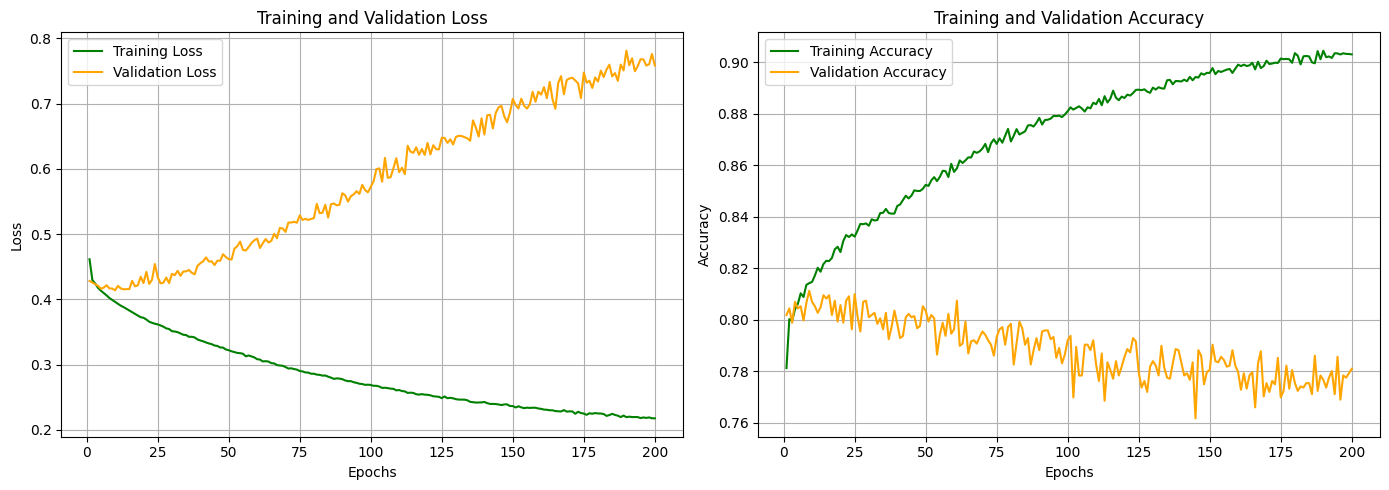

Test Loss: 0.7445806264877319
Test Accuracy: 0.7722427248954773
Test Precision: 0.7723215253661819
Test F1 Score: 0.7722420486260422
Test Recall: 0.7723038779481175

            Model Name  Accuracy  F1 Score    Recall  Precision
0     LinearRegression  0.803627  0.800365  0.793533   0.807315
1  LinearRegressionReg  0.804324  0.800569  0.791725   0.809612
2         RandomForest  0.814387  0.813495  0.816027   0.810978
3                MLP 1  0.776427  0.775607  0.775999   0.779557
4                MLP 2  0.772243  0.772242  0.772304   0.772322


In [48]:
layers_info = [
        {'neurons': 64, 'activation': 'relu', 'kernel_initializer': 'he_uniform'},
        {'neurons': 32, 'activation': 'relu', 'kernel_initializer': 'he_uniform'},
        {'neurons': 2, 'activation': 'softmax'}
    ]
optimizer_info = {'type': 'adam', 'learning_rate': 0.001}
num_epochs = 200
batch_size = 16

mean_resultats_models = entrenar_i_evaluar(X_train, y_train, X_test, y_test, layers_info, optimizer_info, num_epochs, batch_size, resultats_models, 'MLP 2')
print(mean_resultats_models)

A les imatges podem veure que el model s'està sobreajustant molt a les dades del train i acaba donant inclús pitjors resultats que el model amb una sola capa per les dades del test. Per això, ara experimentarem amb dues capes i també amb l'aplicació de una regularització l1 o l2.

### MODEL 3

Afegim regularització a les capes.

Epoch 1/200
1318/1318 - 3s - loss: 0.8141 - accuracy: 0.7598 - val_loss: 0.5611 - val_accuracy: 0.7592 - 3s/epoch - 2ms/step
Epoch 2/200
1318/1318 - 2s - loss: 0.5514 - accuracy: 0.7719 - val_loss: 0.5490 - val_accuracy: 0.7703 - 2s/epoch - 2ms/step
Epoch 3/200
1318/1318 - 2s - loss: 0.5471 - accuracy: 0.7715 - val_loss: 0.5507 - val_accuracy: 0.7703 - 2s/epoch - 2ms/step
Epoch 4/200
1318/1318 - 2s - loss: 0.5465 - accuracy: 0.7700 - val_loss: 0.6168 - val_accuracy: 0.7212 - 2s/epoch - 1ms/step
Epoch 5/200
1318/1318 - 2s - loss: 0.5428 - accuracy: 0.7739 - val_loss: 0.6719 - val_accuracy: 0.7020 - 2s/epoch - 2ms/step
Epoch 6/200
1318/1318 - 2s - loss: 0.5439 - accuracy: 0.7675 - val_loss: 0.5430 - val_accuracy: 0.7652 - 2s/epoch - 1ms/step
Epoch 7/200
1318/1318 - 2s - loss: 0.5462 - accuracy: 0.7696 - val_loss: 0.5212 - val_accuracy: 0.7891 - 2s/epoch - 1ms/step
Epoch 8/200
1318/1318 - 2s - loss: 0.5410 - accuracy: 0.7722 - val_loss: 0.5699 - val_accuracy: 0.7404 - 2s/epoch - 2ms/step


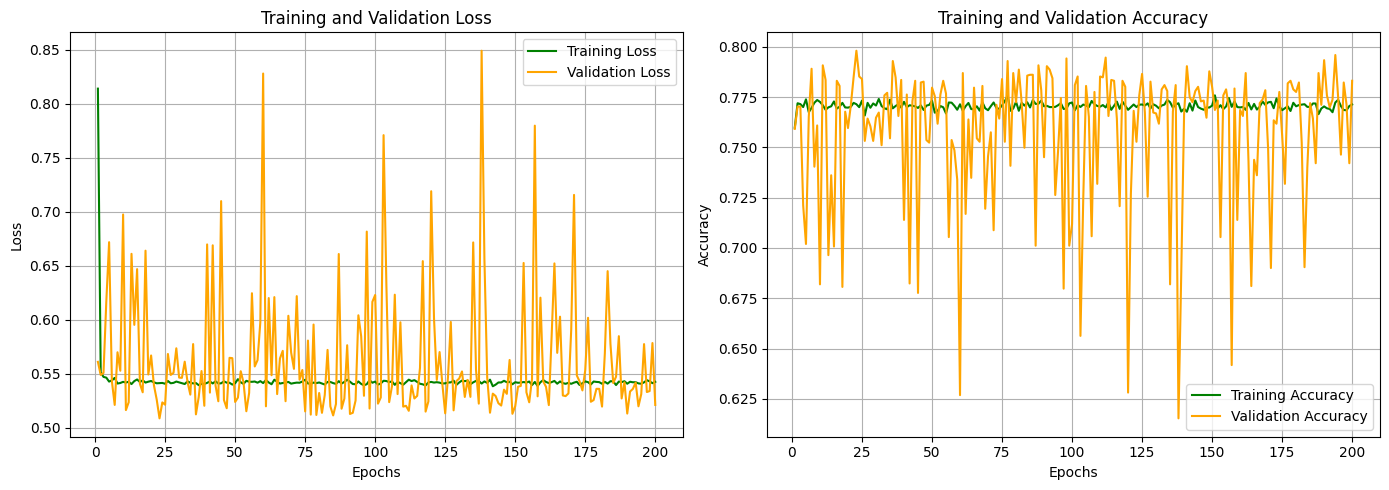

Test Loss: 0.5222795009613037
Test Accuracy: 0.7808110117912292
Test Precision: 0.7858783600788162
Test F1 Score: 0.7800380095722026
Test Recall: 0.7813259938479455

            Model Name  Accuracy  F1 Score    Recall  Precision
0     LinearRegression  0.803627  0.800365  0.793533   0.807315
1  LinearRegressionReg  0.804324  0.800569  0.791725   0.809612
2         RandomForest  0.814387  0.813495  0.816027   0.810978
3                MLP 1  0.776427  0.775607  0.775999   0.779557
4                MLP 2  0.772243  0.772242  0.772304   0.772322
5          MLP 3 (reg)  0.780811  0.780038  0.781326   0.785878


In [49]:
layers_info = [
    {'neurons': 32, 'activation': 'relu', 'regularizer': {'l1': 0.01, 'l2': 0.01}},
    {'neurons': 16, 'activation': 'relu', 'regularizer': {'l1': 0.01, 'l2': 0.01}},
    {'neurons': 2, 'activation': 'softmax'}
]

optimizer_info = {
    'type': 'sgd',
    'learning_rate': 0.01,
    'momentum': 0.9,
    'nesterov': True
}

num_epochs = 200
batch_size = 16

mean_resultats_models = entrenar_i_evaluar(X_train, y_train, X_test, y_test, layers_info, optimizer_info, num_epochs, batch_size, resultats_models, 'MLP 3')
print(mean_resultats_models)

In [ ]:
resultats_models = evaluacio_MLP(X_test, y_test, model, history, resultats_models, 'MLP 3')
print(resultats_models)

### MODEL 3.5

Mateix model que l'anterior però afegim dropout per veure si millora el resultat obtingut.

Epoch 1/150
659/659 - 2s - loss: 0.6866 - accuracy: 0.7497 - val_loss: 0.5646 - val_accuracy: 0.7891 - 2s/epoch - 3ms/step
Epoch 2/150
659/659 - 1s - loss: 0.5472 - accuracy: 0.7856 - val_loss: 0.5196 - val_accuracy: 0.7925 - 1s/epoch - 2ms/step
Epoch 3/150
659/659 - 1s - loss: 0.5137 - accuracy: 0.7898 - val_loss: 0.5035 - val_accuracy: 0.7938 - 1s/epoch - 2ms/step
Epoch 4/150
659/659 - 1s - loss: 0.4989 - accuracy: 0.7903 - val_loss: 0.4837 - val_accuracy: 0.7972 - 1s/epoch - 2ms/step
Epoch 5/150
659/659 - 1s - loss: 0.4885 - accuracy: 0.7915 - val_loss: 0.4771 - val_accuracy: 0.7997 - 1s/epoch - 2ms/step
Epoch 6/150
659/659 - 1s - loss: 0.4810 - accuracy: 0.7930 - val_loss: 0.4694 - val_accuracy: 0.8015 - 1s/epoch - 2ms/step
Epoch 7/150
659/659 - 1s - loss: 0.4758 - accuracy: 0.7924 - val_loss: 0.4830 - val_accuracy: 0.7895 - 1s/epoch - 2ms/step
Epoch 8/150
659/659 - 1s - loss: 0.4722 - accuracy: 0.7941 - val_loss: 0.4616 - val_accuracy: 0.8053 - 1s/epoch - 2ms/step
Epoch 9/150
659/

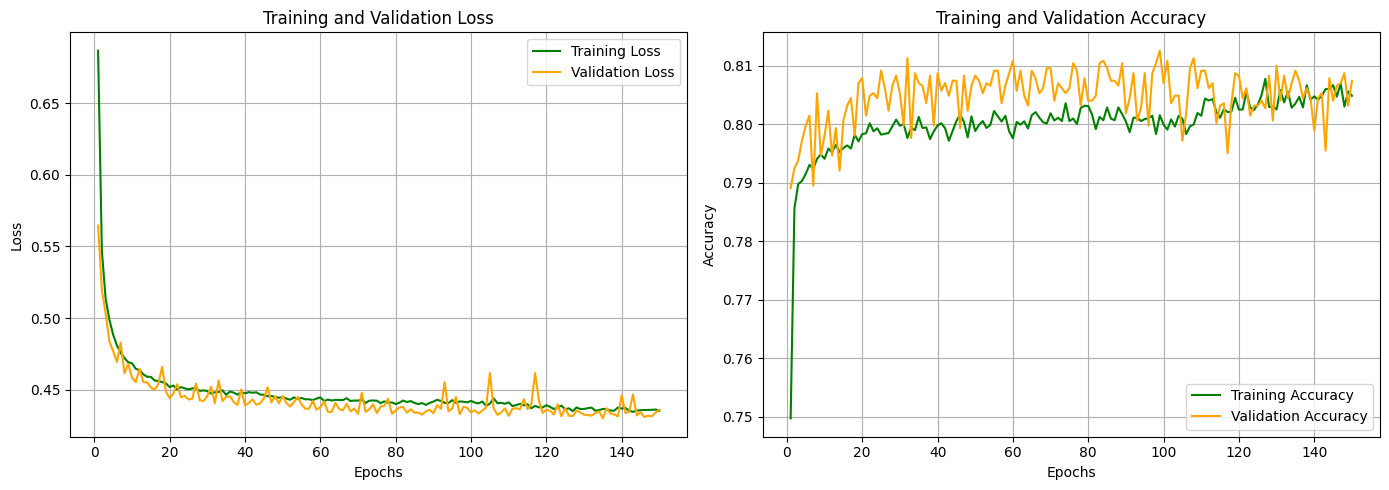

Test Loss: 0.4314398169517517
Test Accuracy: 0.8062170147895813
Test Precision: 0.8068394753900888
Test F1 Score: 0.8060437210744744
Test Recall: 0.8060316754647892

            Model Name  Accuracy  F1 Score    Recall  Precision
0     LinearRegression  0.803627  0.800365  0.793533   0.807315
1  LinearRegressionReg  0.804324  0.800569  0.791725   0.809612
2         RandomForest  0.814387  0.813495  0.816027   0.810978
3                MLP 1  0.776427  0.775607  0.775999   0.779557
4                MLP 2  0.772243  0.772242  0.772304   0.772322
5          MLP 3 (reg)  0.780811  0.780038  0.781326   0.785878
6      MLP 4 (dropout)  0.799044  0.799043  0.799087   0.799080
7      MLP 4 (dropout)  0.796752  0.796752  0.796801   0.796800
8      MLP 4 (dropout)  0.806217  0.806044  0.806032   0.806839


In [55]:
layers_info = [
    {'neurons': 32, 'activation': 'relu', 'regularizer': {'l1': 0.001, 'l2': 0.001}, 'dropout': 0.01},
    {'neurons': 16, 'activation': 'relu', 'regularizer': {'l1': 0.001, 'l2': 0.001}, 'dropout': 0.01},
    {'neurons': 2, 'activation': 'softmax'}  
]

optimizer_info = {
    'type': 'adam',
    'learning_rate': 0.001 
}

num_epochs = 150
batch_size = 32
validation_split = 0.1

mean_resultats_models = entrenar_i_evaluar(X_train, y_train, X_test, y_test, layers_info, optimizer_info, num_epochs, batch_size, resultats_models, 'MLP 3 (dropout)')
print(mean_resultats_models)

Com es pot observar, els resultats amb dropout són millors que sense, per tant, com a últim model provarem d'aplicar dropout, regularització i treurem una capa per veure si el resultat millora.

### MODEL 4 (FINAL)

Epoch 1/200
1318/1318 - 2s - loss: 0.5135 - accuracy: 0.7561 - val_loss: 0.4622 - val_accuracy: 0.7844 - 2s/epoch - 2ms/step
Epoch 2/200
1318/1318 - 2s - loss: 0.4570 - accuracy: 0.7914 - val_loss: 0.4468 - val_accuracy: 0.8002 - 2s/epoch - 1ms/step
Epoch 3/200
1318/1318 - 2s - loss: 0.4468 - accuracy: 0.7956 - val_loss: 0.4407 - val_accuracy: 0.8087 - 2s/epoch - 1ms/step
Epoch 4/200
1318/1318 - 1s - loss: 0.4414 - accuracy: 0.7966 - val_loss: 0.4363 - val_accuracy: 0.8040 - 1s/epoch - 1ms/step
Epoch 5/200
1318/1318 - 1s - loss: 0.4389 - accuracy: 0.7979 - val_loss: 0.4377 - val_accuracy: 0.8040 - 1s/epoch - 1ms/step
Epoch 6/200
1318/1318 - 1s - loss: 0.4368 - accuracy: 0.8018 - val_loss: 0.4368 - val_accuracy: 0.8070 - 1s/epoch - 1ms/step
Epoch 7/200
1318/1318 - 1s - loss: 0.4353 - accuracy: 0.8024 - val_loss: 0.4426 - val_accuracy: 0.8044 - 1s/epoch - 1ms/step
Epoch 8/200
1318/1318 - 1s - loss: 0.4325 - accuracy: 0.8006 - val_loss: 0.4336 - val_accuracy: 0.8061 - 1s/epoch - 1ms/step


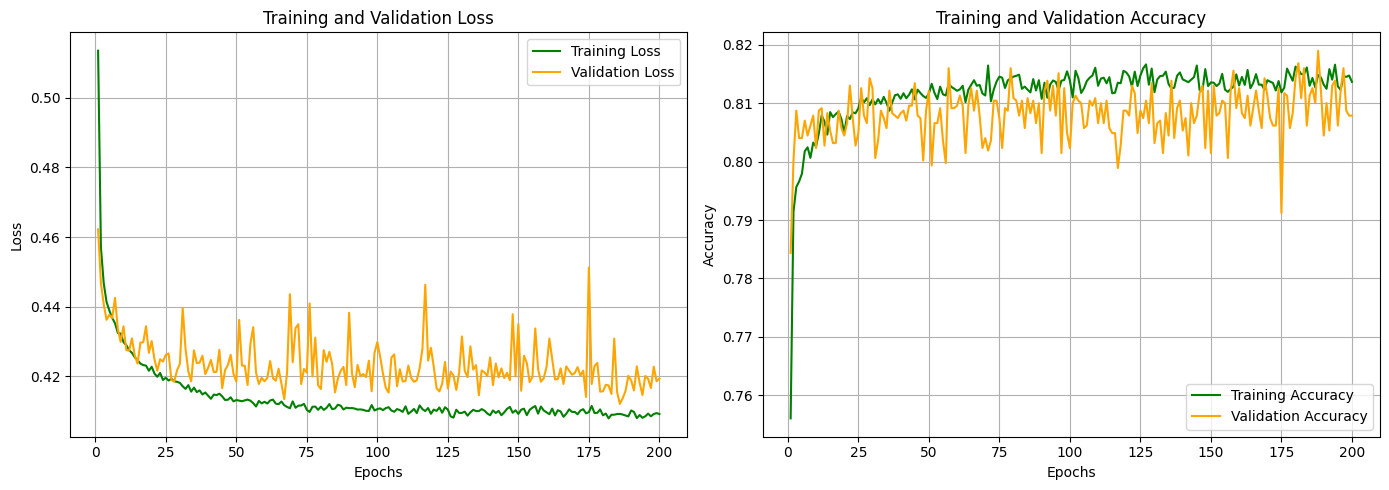

Test Loss: 0.4150644540786743
Test Accuracy: 0.812593400478363
Test Precision: 0.8126017917492419
Test F1 Score: 0.8125700662149091
Test Recall: 0.812555913960818

[[0.32703173 0.6729682 ]
 [0.960957   0.039043  ]
 [0.85562044 0.14437956]
 ...
 [0.6535123  0.34648773]
 [0.93019515 0.06980477]
 [0.17675754 0.8232424 ]]


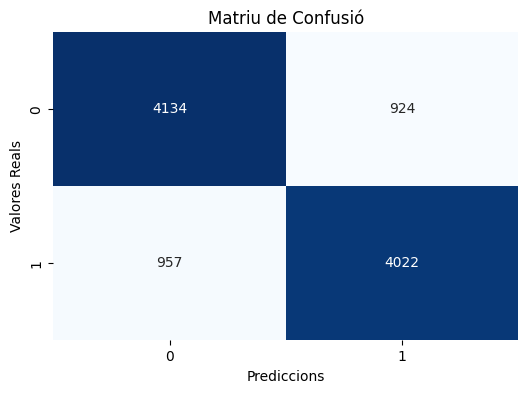

ValueError: y should be a 1d array, got an array of shape (10037, 2) instead.

In [127]:
from keras.regularizers import l2

layers_info = [
    {'neurons': 16, 'activation': 'relu', 'regularizer': {'l2': 0.001},'dropout': 0.01},  # Primera capa oculta con regularización L2
    {'neurons': 2, 'activation': 'softmax'}  
]

optimizer_info = {
    'type': 'adam',
    'learning_rate': 0.001 
}

num_epochs = 200  
batch_size = 16 
validation_split = 0.1  

mean_resultats_models = entrenar_i_evaluar(X_train, y_train, X_test, y_test, layers_info, optimizer_info, num_epochs, batch_size, resultats_models, 'MLP FINAL')
print(mean_resultats_models)

314/314 [==============================] - 0s 815us/step


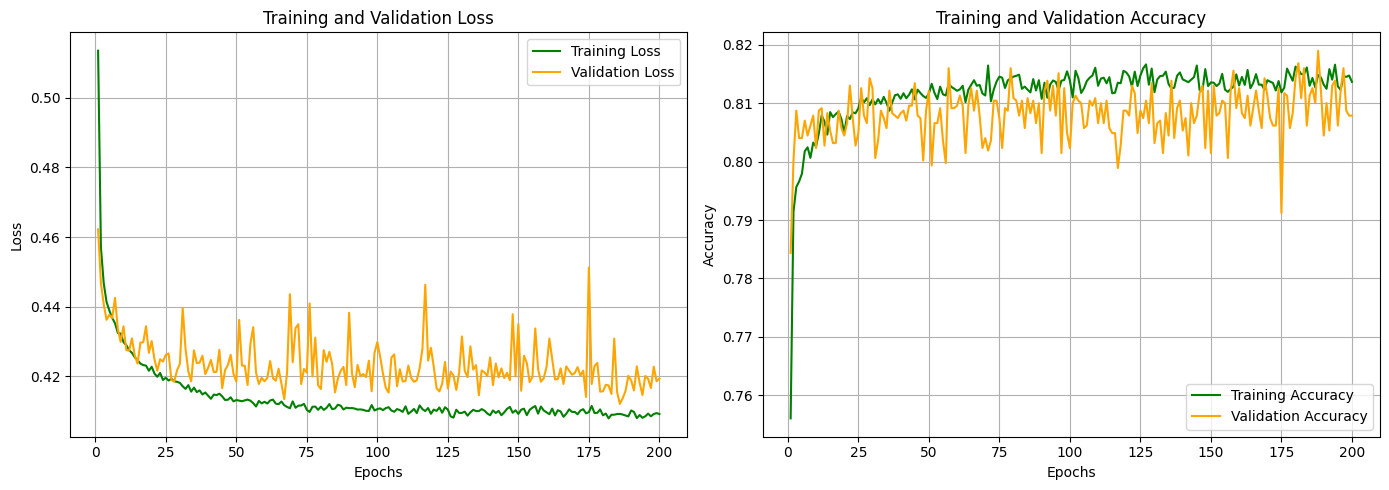

Test Loss: 0.4150644540786743
Test Accuracy: 0.812593400478363
Test Precision: 0.8126017917492419
Test F1 Score: 0.8125700662149091
Test Recall: 0.812555913960818



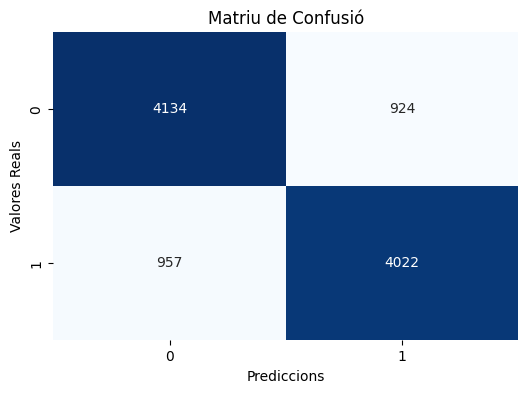

             Model Name  Accuracy  F1 Score    Recall  Precision
0      LinearRegression  0.803627  0.800365  0.793533   0.807315
1      LinearRegression  0.803627  0.800365  0.793533   0.807315
2      LinearRegression  0.803627  0.800365  0.793533   0.807315
3      LinearRegression  0.803627  0.800365  0.793533   0.807315
4      LinearRegression  0.803627  0.800365  0.793533   0.807315
5   LinearRegressionReg  0.804324  0.800528  0.791524   0.809739
6          RandomForest  0.816778  0.815897  0.818437   0.813373
7          RandomForest  0.819269  0.818636  0.822253   0.815051
8          RandomForest  0.817276  0.816966  0.822053   0.811942
9                 MLP 1  0.812593  0.812570  0.812556   0.812602
10            MLP FINAL  0.812593  0.812570  0.812556   0.812602


In [132]:
resultats_models = evaluacio_MLP(X_test, y_test, model, history, resultats_models, 'MLP FINAL')
print(resultats_models)

Aquest model final és el que ha donat millors resultats.

Finalment, s'ha realitzat una taula comparativa amb tots els models testejats.

In [91]:
resultats_models

,Model Name,Accuracy,F1 Score,Recall,Precision
0,LinearRegression,0.803627,0.800365,0.793533,0.807315
1,LinearRegressionReg,0.804324,0.800569,0.791725,0.809612
2,RandomForest,0.814387,0.813495,0.816027,0.810978
3,MLP 1,0.776427,0.775607,0.775999,0.779557
4,MLP 2,0.772243,0.772242,0.772304,0.772322
5,MLP 3 (reg),0.780811,0.780038,0.781326,0.785878
6,MLP 4 (dropout),0.799044,0.799043,0.799087,0.799080
7,MLP 4 (dropout),0.796752,0.796752,0.796801,0.796800
8,MLP 4 (dropout),0.806217,0.806044,0.806032,0.806839
9,MLP 4 (2capes-drop),0.811497,0.811269,0.811821,0.813682
